#Инструкция по запуску:

После выполнения первой ячейки есть вероятность увидеть следующее изображение:

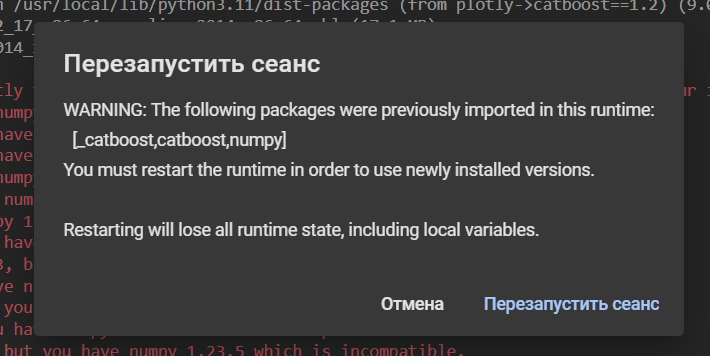

Если Вы столкнулись с данной проблемой, то нужно перезапустить сеанс и снова запустить первую ячейку, она снова выдаст это предупреждение, но в этот раз перезапускать сеанс уже не нужно, нужно просто запускать ячейки дальше.

#Установка необходимых библиотек

In [1]:
!pip uninstall numpy catboost -y
!pip install numpy==1.23.5 catboost==1.2

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: catboost 1.2
Uninstalling catboost-1.2:
  Successfully uninstalled catboost-1.2
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached catboost-1.2-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached catboost-1.2-cp311-cp311-manylinux2014_x86_64.whl (98.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is inc

In [2]:
!pip install phik

In [3]:
!pip install statsmodels

#Загрузка датасета

In [4]:
!gdown 1L0p_hcZPEYuvqOUr2y3pvpKBqSPSuTCt

Downloading...
From (original): https://drive.google.com/uc?id=1L0p_hcZPEYuvqOUr2y3pvpKBqSPSuTCt
From (redirected): https://drive.google.com/uc?id=1L0p_hcZPEYuvqOUr2y3pvpKBqSPSuTCt&confirm=t&uuid=fc591375-9e72-493d-a5cb-35df72e4ab95
To: /content/CupIT_Sber_data.csv
100% 230M/230M [00:02<00:00, 102MB/s]


#Первичный анализ

In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/CupIT_Sber_data.csv', sep=';')

In [6]:
data.head(10)

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00.0000000,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00.0000000,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00.0000000,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00.0000000,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00.0000000,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0
5,0x9792A4526F5FAFFA2537A6526B6AC23C,0xE02E4412BB1F637FC4CDAFC793C4F7A4,2022-01-01 12:31:00.0000000,1720,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x129AB4F27EAA6C675A4E116AB616FE48,0x95758EBA87326C4D5DECC8B51A8B9C61,0
6,0x750447893A808F22D0E7BEBDADB58999,0xC97D0DF950D35FA4AF2655D749259B36,2022-01-01 12:46:00.0000000,1160,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x887078A50C93C3DFCCF23B6656BF767B,0x780F9A97F1A590D0CE88314FC065E5C8,0
7,0x07EA51E045B591DC5FBA5C1E6D7DEA4B,0x04848F8B05C6935CCECC26FB024BDC6E,2022-01-01 12:41:00.0000000,1720,0x405E158AE7F0523296EB12EECD73CD79,0x82078385014C595F44D63882A268F47A,0x95758EBA87326C4D5DECC8B51A8B9C61,0
8,0x32B405A9613D446FF83E2E73867A1B49,0xBBAF849258EA3A4CE4B58D2C7686775C,2022-01-01 12:55:00.0000000,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0x54054703A9278593F2C779D0E128A3A6,0x95758EBA87326C4D5DECC8B51A8B9C61,0
9,0x13781E636B106FF5B49921B1412BF3F5,0x8D8D44EEDA40B1AE7B659A5A738BF4F3,2022-01-01 12:59:00.0000000,312,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x6C73CDEE350763C4670140261DE1682A,0x30F13D536D6834EBBCA4E5E9B0EC212E,0


Сортируем по дате

In [7]:
data.sort_values(by='service_date')

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00.0000000,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00.0000000,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0
209,0x52EC5F105E1A112873CE07084FEE2244,0xAE125696322F73FD958DF6FE423A38F5,2022-01-01 12:20:00.0000000,425,0x4722B1782AB7DC9B16B2CC933C2A9E52,0xBD46A7B2FCD9FC493D8E2EDBE225C9D1,0x01D029DF0704C6B5891DF7C601181E4D,0
208,0x70DD8F04A3C25809711899976DB2E8BA,0x85693A3739998C3F26FA037A6C7DC77E,2022-01-01 12:20:00.0000000,1921,0x4722B1782AB7DC9B16B2CC933C2A9E52,0xD913F10965FA2B60C031D03112BD3D02,0x7AE965F70DAE2CDB24F3B08C0B4C6CE8,0
206,0xD73A30C89136B625560F01F20F642148,0x476385497B98C5D85BBB966E8BCB3319,2022-01-01 12:20:00.0000000,"1640,5",0x4722B1782AB7DC9B16B2CC933C2A9E52,0x1CFFA4B1194317ABBF88267E29739718,0x9A574462105283982706076B43E656BD,0
...,...,...,...,...,...,...,...,...
1090977,0x8EEF0D22F0F1B091608B6231133C8DD4,0x500BDC514F2A9C63F9C1968A0B7CE2C0,2023-12-31 17:34:00.0000000,"13,71",0xCAD93EDD7E8593190FB7D3728D66D1BD,0x2165571DB4EF41EECCD050DD1C4FABAA,0xFC98F1E83B20FA30BEC6DF7BB4D02D74,0
1090968,0xBF7CBE9DAB91FE33214440D65CB8CA06,0x9C7000465DE80BB0C1613E44CF368DCD,2023-12-31 17:34:00.0000000,"1518,07",0xCAD93EDD7E8593190FB7D3728D66D1BD,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0
1090967,0x8AC66E4A3F207ACCEF340C6ACA3C11A6,0xFAA7695E600E871E9CD64EC250D5D4EC,2023-12-31 17:34:00.0000000,7138,0xCAD93EDD7E8593190FB7D3728D66D1BD,0xA5B4D2DDE961BEFC2BAC5E8960382A6E,0x834A7BF96A7A752F8D58493F50C9D8CB,0
1090970,0x836224ABD4E4279297958899C88B57E5,0x3A7408F89C37D813F95C5DE6B9CB10D3,2023-12-31 18:48:00.0000000,13500,0x654E6D737A7C1A4906758D4EF75C6076,0x3E6A29A25856B94A9BA989AC6D182545,0x266F51CD4CE99C60838643DC48070979,0


In [8]:
data.describe()

,is_hospital
count,1.091043e+06
mean,9.259488e-02
std,2.898640e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091043 entries, 0 to 1091042
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   service_document_id  1091043 non-null  object
 1   account_document_id  1091043 non-null  object
 2   service_date         1091043 non-null  object
 3   service_amount_net   1091043 non-null  object
 4   patient_id           1091043 non-null  object
 5   service_code         1091043 non-null  object
 6   service_name         1091043 non-null  object
 7   is_hospital          1091043 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 66.6+ MB


In [10]:
data.loc[data['service_name'] == '0x95758EBA87326C4D5DECC8B51A8B9C61', 'service_code'].value_counts()

,count
service_code,
0xCDEA5658E0AD52E1700653CAE2A4928D,16780
0x332E8D3220A5317B23558A5E79CE00E4,14832
0x54054703A9278593F2C779D0E128A3A6,11057
0x4F8A79924D1B8D817FC07D5B0814052F,9891
0xC9178011BA3F7F60E28BFE503478E35B,9400
...,...
0x7F14EA1DA585FE31B064B97627646157,1
0xB6F9224310282FFF00065E7989E58BAB,1
0x34550D9F86B74F6885E46B35819F3130,1


In [11]:
data.loc[data['service_code'] == '0xCDEA5658E0AD52E1700653CAE2A4928D', 'service_name'].value_counts()

,count
service_name,
0x95758EBA87326C4D5DECC8B51A8B9C61,16780


Получается, service_name - категории, а service_code - подкатегории в этих категориях

In [12]:
data['service_document_id'].value_counts()[data['service_document_id'].value_counts() > 1]

,count
service_document_id,
0x15075263622836BE21F6ACB4FA8E4BF3,5
0x864FB272E89454CD72197128F400BAAC,3
0x633F8A146E95A4D3658B22B260C75196,3
0xBE186EFDA44422D591A558F8CBE28564,3
0xDA04A42EC25E7DF616078B7DA0E8FC5E,3
...,...
0x73E0EAEAC5E8E5283C798E394D1F29DB,2
0x78AB2DBC1B41C19920E934B5401E71B2,2
0xD6E1F1B7FC9447677271FAB94421F536,2


In [13]:
data.loc[data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital
298369,0x15075263622836BE21F6ACB4FA8E4BF3,0xE3AD0B25AAB74181C30E1895104D2C04,2022-07-31 18:07:00.0000000,2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0
394920,0x15075263622836BE21F6ACB4FA8E4BF3,0x025EEF6559D288810B72E30DA01C72BC,2022-10-06 15:57:31.0000000,-2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0
394921,0x15075263622836BE21F6ACB4FA8E4BF3,0xC957FFB34F7C95C41DA082B6ECB21592,2022-10-06 15:57:31.0000000,2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0
394922,0x15075263622836BE21F6ACB4FA8E4BF3,0x5220BB151561EBCC97CE43EAFC084896,2022-10-06 15:57:57.0000000,-2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0
394923,0x15075263622836BE21F6ACB4FA8E4BF3,0x6B0CF840E51EF9A9B86E19CB514FB490,2022-10-06 15:57:57.0000000,2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0


In [14]:
data['patient_id'].value_counts()

,count
patient_id,
0x037AB9CF4BAF80A173679FB9761A113D,4121
0xAECAFBEC992080A28B6351DC1E1551C2,2165
0x274B520D2D54E1604C6E69410A728CE0,1959
0xEA73B2A80C0D9647C3ABFA65195CFCBE,1951
0x53A2C720806E07E267EE2E32C7EEB8DF,1324
...,...
0x19EDCF485328554ED36D46FEB7429725,1
0xBAE4DC6D24E85E885E83CD0AC506006A,1
0x050E88F1CA218A5B25DF517448D9B6C4,1


#Добавление новых признаков

Добавление временных признаков

In [15]:
def add_date_time_columns(df, date_column):

    df[date_column] = pd.to_datetime(df[date_column])

    df['year'] = df[date_column].dt.year
    df['month'] = df[date_column].dt.month
    df['date'] = df[date_column].dt.date
    df['time'] = df[date_column].dt.time
    df['hour'] = df[date_column].dt.hour
    df['day'] = df[date_column].dt.day

    return df

In [16]:
data = add_date_time_columns(data, 'service_date')

In [17]:
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Добавление колонки с днями недели

In [19]:
#день недели
from datetime import datetime
import numpy as np
days_ru = {
    0: "ПН",
    1: "ВТ",
    2: "СР",
    3: "ЧТ",
    4: "ПТ",
    5: "СБ",
    6: "ВС"
}
data['weekday_name'] = np.vectorize(lambda x: days_ru[x.weekday()])(data['date'])
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day,weekday_name
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1,СБ
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1,СБ
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1,СБ
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1,СБ
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1,СБ


Добавление колонки с выходными

In [20]:
#выходные
#1-выходной, 0-нет

def wknd(x):
    if x == 'СБ' or x == 'ВС':
        return 1
    else:
        return 0
data['weekends'] = np.vectorize(wknd)(data['weekday_name'])
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day,weekday_name,weekends
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1,СБ,1
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1,СБ,1
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1,СБ,1
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1,СБ,1
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1,СБ,1


Добавление колонки с праздниками

In [21]:
#праздники
#1-праздник, 0-нет
def hld(x):
    m = [
        '2022-01-01',
        '2022-01-02',
        '2022-01-03',
        '2022-01-04',
        '2022-01-05',
        '2022-01-06',
        '2022-01-07',
        '2022-01-08',
        '2022-02-23',
        '2022-03-08',
        '2022-05-01',
        '2022-05-09',
        '2022-06-12',
        '2022-11-04',
        '2022-05-03',
        '2022-05-10',
        '2022-03-07',
        '2023-01-01',
        '2023-01-02',
        '2023-01-03',
        '2023-01-04',
        '2023-01-05',
        '2023-01-06',
        '2023-01-07',
        '2023-01-08',
        '2023-02-23',
        '2023-03-08',
        '2023-05-01',
        '2023-05-09',
        '2023-06-12',
        '2023-11-04',
        '2023-02-24',
        '2023-05-08'
    ]
    if x in m:
        return 1
    else:
        return 0
data['holidays'] = np.vectorize(hld)(data['date'].astype(str))

Заменили значения в service_amount_net со строк на числа

In [22]:
data['service_amount_net'] = data['service_amount_net'].str.replace(',', '.', regex=False)

In [23]:
data['service_amount_net'] = data['service_amount_net'].astype(float)

In [24]:
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day,weekday_name,weekends,holidays
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925.0,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1,СБ,1,1
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800.0,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1,СБ,1,1
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710.0,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1,СБ,1,1
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040.0,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1,СБ,1,1
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200.0,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1,СБ,1,1


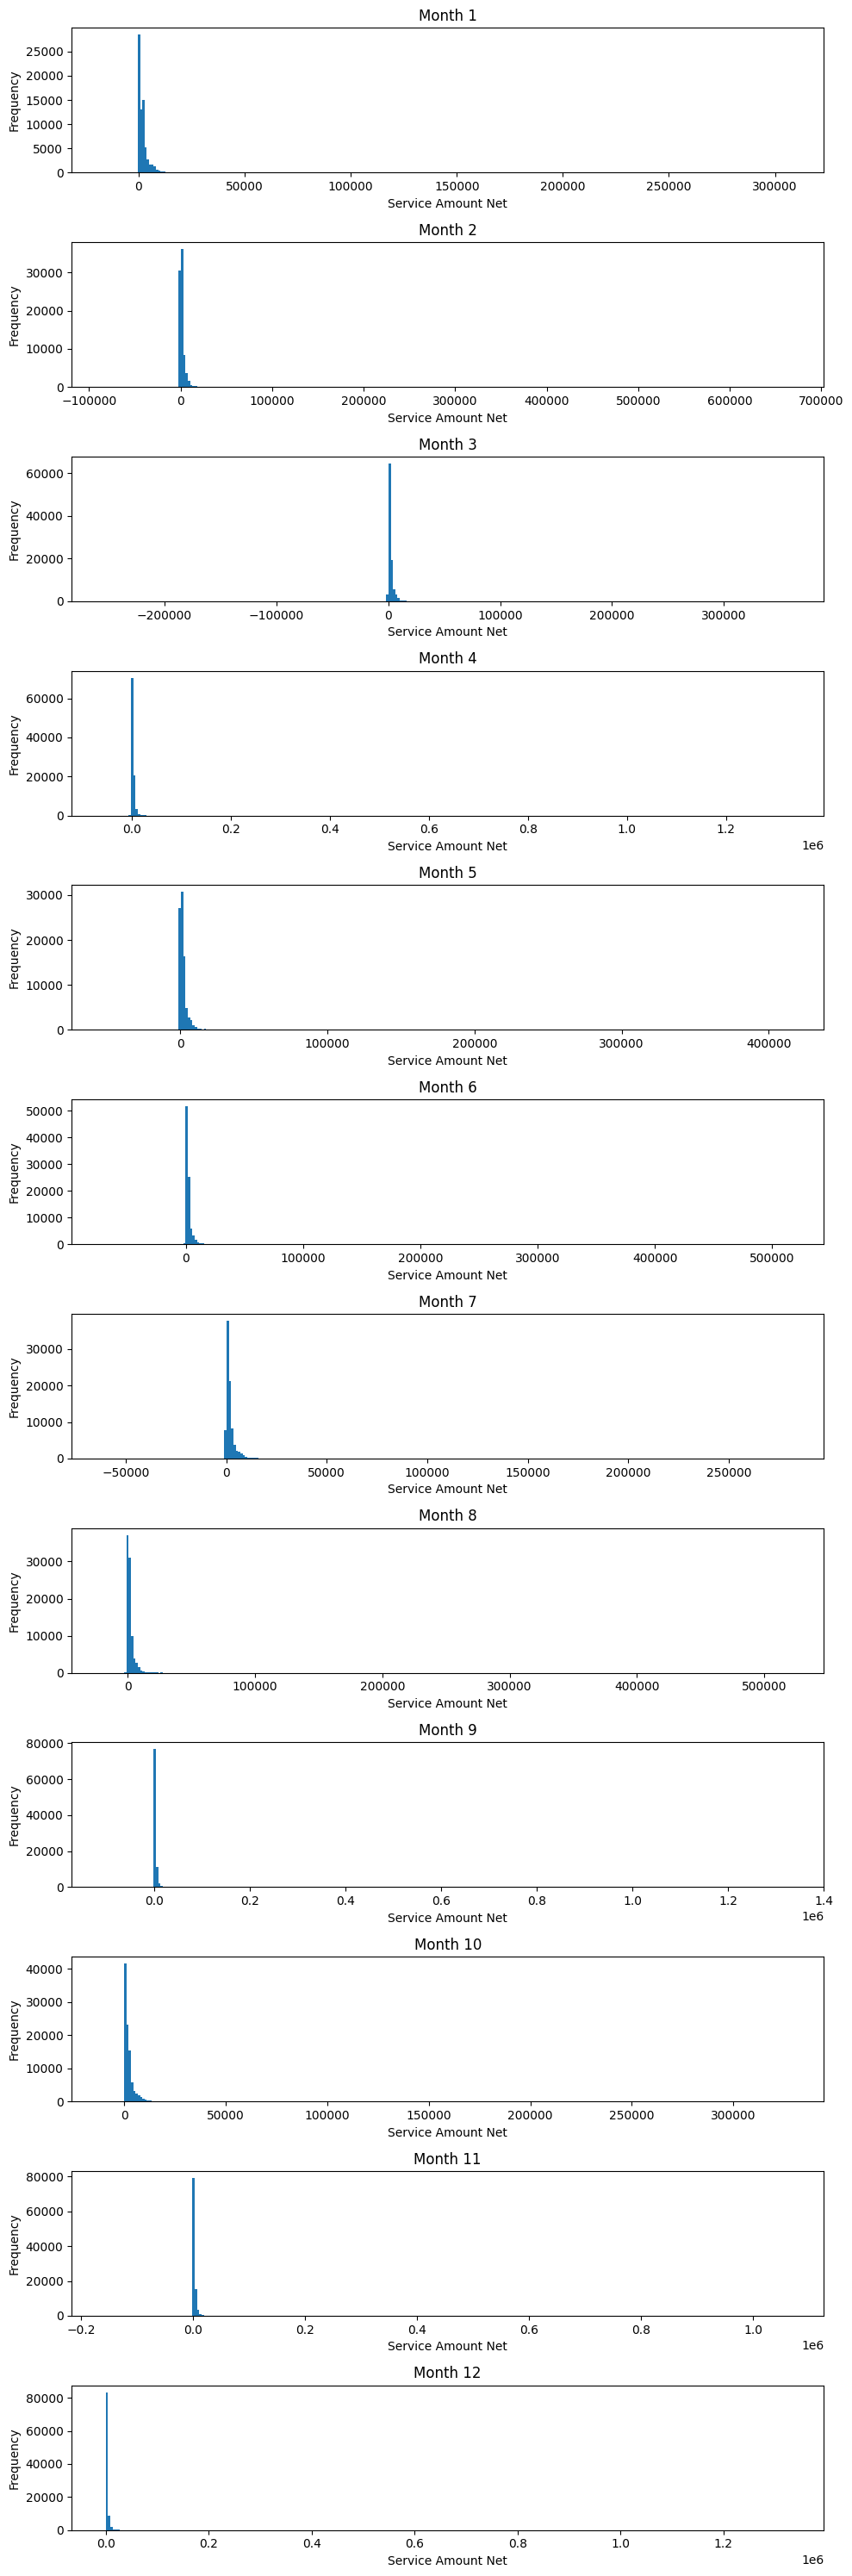

In [25]:
fig, axes = plt.subplots(12, 1, figsize=(10, 30))
for i in range(1, 13):
    data_month = data.loc[(data['month'] == i) &
                         (data['service_amount_net'] > -10000000) &
                         (data['service_amount_net'] < 10000000)]
    axes[i-1].hist(data_month['service_amount_net'], bins=300)
    axes[i-1].set_title(f'Month {i}')
    axes[i-1].set_xlabel('Service Amount Net')
    axes[i-1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

Добавление колонок со статистиками service_amount_net по service_code

In [26]:
def add_service_code_statistics(df):
    grouped = df.groupby('service_code')['service_amount_net'].agg(
        service_code_mean='mean',
        service_code_median='median',
        service_code_std='std'
    ).reset_index()

    df = df.merge(grouped, on='service_code', how='left')

    return df

In [27]:
data = add_service_code_statistics(data)

In [28]:
data['service_code_std'] = data['service_code_std'].fillna(0)

Добавление колонок со статистиками service_amount_net по service_name

In [29]:
def add_service_name_statistics(df):
    grouped = df.groupby('service_name')['service_amount_net'].agg(
        service_name_mean='mean',
        service_name_median='median',
        service_name_std='std'
    ).reset_index()

    df = df.merge(grouped, on='service_name', how='left')

    return df

In [30]:
data = add_service_name_statistics(data)
data['service_name_std'] = data['service_name_std'].fillna(0)
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,...,day,weekday_name,weekends,holidays,service_code_mean,service_code_median,service_code_std,service_name_mean,service_name_median,service_name_std
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925.0,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,...,1,СБ,1,1,2288.290331,2104.0,844.972010,2736.985463,2208.0,2045.034290
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800.0,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,...,1,СБ,1,1,5176.288072,4639.8,2189.748316,5176.288072,4639.8,2189.748316
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710.0,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,...,1,СБ,1,1,1682.299101,1395.2,925.269174,2388.233015,1453.5,2341.395651
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040.0,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,...,1,СБ,1,1,1725.591607,1700.0,544.285041,1725.591607,1700.0,544.285041
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200.0,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,...,1,СБ,1,1,2353.000907,2104.0,1157.653136,2736.985463,2208.0,2045.034290


Добавление колонки с временным интервалом между первой и последней датами сторнированных операций

Внимание, эта ячейка выполняется примерно 6 минут

In [31]:
data['delta_time'] = data.groupby('service_document_id')['service_date'].transform(lambda x: x.max() - x.min())
data.loc[data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,...,weekday_name,weekends,holidays,service_code_mean,service_code_median,service_code_std,service_name_mean,service_name_median,service_name_std,delta_time
298369,0x15075263622836BE21F6ACB4FA8E4BF3,0xE3AD0B25AAB74181C30E1895104D2C04,2022-07-31 18:07:00,2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,7,...,ВС,1,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57
394920,0x15075263622836BE21F6ACB4FA8E4BF3,0x025EEF6559D288810B72E30DA01C72BC,2022-10-06 15:57:31,-2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,...,ЧТ,0,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57
394921,0x15075263622836BE21F6ACB4FA8E4BF3,0xC957FFB34F7C95C41DA082B6ECB21592,2022-10-06 15:57:31,2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,...,ЧТ,0,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57
394922,0x15075263622836BE21F6ACB4FA8E4BF3,0x5220BB151561EBCC97CE43EAFC084896,2022-10-06 15:57:57,-2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,...,ЧТ,0,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57
394923,0x15075263622836BE21F6ACB4FA8E4BF3,0x6B0CF840E51EF9A9B86E19CB514FB490,2022-10-06 15:57:57,2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,...,ЧТ,0,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57


Добавление колонки с количеством операций по одному service_document_id и колонки со стандартным отклонением service_amount_net в пределах одного service_document_id

In [32]:
data['correction_count'] = data.groupby('service_document_id')['service_amount_net'].transform('count')
data['amount_std'] = data.groupby('service_document_id')['service_amount_net'].transform('std')

In [33]:
data['correction_count'].value_counts()

,count
correction_count,
1,1077530
2,11996
3,1512
5,5


Обработка сторнирования

In [34]:
result_data = data.groupby('service_document_id', as_index=False).agg({
    'service_amount_net': 'sum',
    'service_date': 'first'
})

In [35]:
result_data.loc[result_data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

,service_document_id,service_amount_net,service_date
89380,0x15075263622836BE21F6ACB4FA8E4BF3,2876.0,2022-07-31 18:07:00


In [36]:
merged_df = pd.merge(result_data, data, on='service_document_id', suffixes=('_agg', '_original'))

data = merged_df.drop_duplicates(subset='service_document_id')
data.drop(columns=['service_date_original', 'service_amount_net_original'], inplace=True)

<ipython-input-36-fe787a764f23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['service_date_original', 'service_amount_net_original'], inplace=True)


In [37]:
data.loc[data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

,service_document_id,service_amount_net_agg,service_date_agg,account_document_id,patient_id,service_code,service_name,is_hospital,year,month,...,holidays,service_code_mean,service_code_median,service_code_std,service_name_mean,service_name_median,service_name_std,delta_time,correction_count,amount_std
89984,0x15075263622836BE21F6ACB4FA8E4BF3,2876.0,2022-07-31 18:07:00,0xE3AD0B25AAB74181C30E1895104D2C04,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,7,...,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57,5,3150.500151


In [38]:
data = data.rename(columns={'service_amount_net_agg': 'service_amount_net', 'service_date_agg': 'service_date'})
data

,service_document_id,service_amount_net,service_date,account_document_id,patient_id,service_code,service_name,is_hospital,year,month,...,holidays,service_code_mean,service_code_median,service_code_std,service_name_mean,service_name_median,service_name_std,delta_time,correction_count,amount_std
0,0x000016C54759E322AB2DF3CB8F8E40B2,2337.5,2022-01-23 11:44:00,0x47DBA428BB3ABED3574F0E692861F3D0,0xA9A8B0F7A3CB1ACA3ED719C206DAA412,0x54054703A9278593F2C779D0E128A3A6,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,...,0,2276.728608,2104.00,832.870468,2736.985463,2208.00,2045.034290,0 days,1,NaN
1,0x00001FB9CEC8ABEEA189D32E6048EAA6,296.0,2022-09-23 08:16:00,0x8082B69F9F9BD027DCAB22FE0F642FC3,0x7D1A8EC85C60A872D1A1B2B063BD9299,0x6C73CDEE350763C4670140261DE1682A,0x30F13D536D6834EBBCA4E5E9B0EC212E,0,2022,9,...,0,348.111667,331.50,143.526217,349.061689,331.50,143.875442,0 days,1,NaN
2,0x0000240CBF0440CB1BB75046E75111BF,2833.6,2022-07-27 12:54:00,0x74C65515BC32E0C56CBFE9DDC31C2772,0x20C1A2C6DE962CC37FF375C1DCFB1C94,0x05EC231290D0034ED6DABA918BE83A82,0xA7AB68E942204E8F7B65D9BE0FF048F9,0,2022,7,...,0,4104.137033,3864.00,1483.363837,3922.883921,3736.80,1502.594652,0 days,1,NaN
3,0x0000707B2C632D6BE33F5800FB4B341D,1118.4,2022-08-25 19:36:00,0x2BDC318559F329B6019DF4BC64719A96,0xD35D4B33D44436E9E48B72CDA0B44863,0xD2D3E01D92CA13192A87FA427ABB4F8B,0xA2BDFCF3FEF436081FAA7EFC11E9C2F3,0,2022,8,...,0,1319.329926,1324.80,391.417747,1319.329926,1324.80,391.417747,0 days,1,NaN
4,0x000070D8EC8503CB41D2164FC694F541,400.0,2022-11-27 15:32:00,0xF8939271C951971DF869839CB6E3D990,0x4DBBA946EA4F673F52231FFEE11DC7D9,0xC0648CF805184F2731849993EABDCA8C,0x7BDEF615E9C1BA035977A12D03C8A28C,0,2022,11,...,0,508.996253,496.00,166.461959,502.724651,486.40,182.131307,0 days,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091038,0xFFFF9423AC1C6AEC3323F2E9E0D4606B,3152.0,2022-08-02 11:57:00,0xAC3A31761C78784AA21958203CF66B2B,0xBF2917D3A938AC936604F09ECB9A1756,0x0F94290D379321B128826096A2C4E1EA,0xC58693658D60CAD94C79C665747CCCB8,0,2022,8,...,0,4063.393315,3535.00,2086.252287,2978.063649,2324.00,2204.363275,0 days,1,NaN
1091039,0xFFFF9C67B7D4143E69AB051B6BCC65D1,1997.6,2023-05-05 09:40:00,0x14A3039CF2DA472EFBDBE56EDE57B973,0x0B6968A70783F2C6745A08E0866B5747,0x332E8D3220A5317B23558A5E79CE00E4,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2023,5,...,0,2490.246355,2440.00,842.303649,2736.985463,2208.00,2045.034290,0 days,1,NaN
1091040,0xFFFFB3CE7B8823BA5F2DAD4842C00A17,2150.0,2022-05-05 10:08:00,0x5E6B4FDDEDF24C362588A6F1798BCD2F,0xD1BE9ADB9030CA63CFA970915B29B834,0x88279E546FF3469C6DE326908DDC010C,0x8B079834541542B443EDB050A3F6ABD6,0,2022,5,...,0,1263.837500,1694.55,996.328156,1263.837500,1694.55,996.328156,0 days,1,NaN
1091041,0xFFFFCDC1B7068FEA00351309E3B7DDFC,309.6,2023-02-02 08:53:00,0xE608834F64F069D2579DA969C82A600D,0x0D29E4EC799B80DD303AACCB3ADD68DA,0x6C73CDEE350763C4670140261DE1682A,0x30F13D536D6834EBBCA4E5E9B0EC212E,0,2023,2,...,0,348.111667,331.50,143.526217,349.061689,331.50,143.875442,0 days,1,NaN


In [39]:
data = data.loc[data['service_amount_net'] >= 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082822 entries, 0 to 1091042
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype          
---  ------               --------------    -----          
 0   service_document_id  1082822 non-null  object         
 1   service_amount_net   1082822 non-null  float64        
 2   service_date         1082822 non-null  datetime64[ns] 
 3   account_document_id  1082822 non-null  object         
 4   patient_id           1082822 non-null  object         
 5   service_code         1082822 non-null  object         
 6   service_name         1082822 non-null  object         
 7   is_hospital          1082822 non-null  int64          
 8   year                 1082822 non-null  int32          
 9   month                1082822 non-null  int32          
 10  date                 1082822 non-null  object         
 11  time                 1082822 non-null  object         
 12  hour                 1082822 non-null  int32   

In [40]:
data['amount_std'] = data['amount_std'].fillna(0)

<ipython-input-40-94c3587b92dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['amount_std'] = data['amount_std'].fillna(0)


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082822 entries, 0 to 1091042
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype          
---  ------               --------------    -----          
 0   service_document_id  1082822 non-null  object         
 1   service_amount_net   1082822 non-null  float64        
 2   service_date         1082822 non-null  datetime64[ns] 
 3   account_document_id  1082822 non-null  object         
 4   patient_id           1082822 non-null  object         
 5   service_code         1082822 non-null  object         
 6   service_name         1082822 non-null  object         
 7   is_hospital          1082822 non-null  int64          
 8   year                 1082822 non-null  int32          
 9   month                1082822 non-null  int32          
 10  date                 1082822 non-null  object         
 11  time                 1082822 non-null  object         
 12  hour                 1082822 non-null  int32   

Проверка влияния сезонных акций СберСтрахования на целевую переменную service_amount_net

In [42]:
def add_rpss2022(date):
    return 1 if pd.Timestamp("2022-11-28") <= date <= pd.Timestamp("2023-01-31") else 0

def add_save25(date):
    return 1 if pd.Timestamp("2022-02-04") <= date <= pd.Timestamp("2022-02-20") else 0

def add_dedmoroz(date):
    return 1 if pd.Timestamp("2022-01-01") <= date <= pd.Timestamp("2022-01-20") else 0

def add_greenday(date):
    return 1 if pd.Timestamp("2023-11-09") <= date <= pd.Timestamp("2023-11-12") else 0

def add_skidkanastrovku(date):
    return 1 if pd.Timestamp("2023-10-10") <= date <= pd.Timestamp("2023-11-08") else 0

def add_rpss2023(date):
    return 1 if pd.Timestamp("2023-06-13") <= date <= pd.Timestamp("2023-08-31") else 0

def add_sberagifinancy(date):
    return 1 if pd.Timestamp("2023-05-29") <= date <= pd.Timestamp("2023-07-09") else 0

In [43]:
data["RPSS2022"] = data["service_date"].apply(add_rpss2022)
data["SAVE25"] = data["service_date"].apply(add_save25)
data["DEDMOROZ"] = data["service_date"].apply(add_dedmoroz)
data["GREENDAY"] = data["service_date"].apply(add_greenday)
data["SKIDKANASTRAHOVKU"] = data["service_date"].apply(add_skidkanastrovku)
data["RPSS2023"] = data["service_date"].apply(add_rpss2023)
data["SBEREGIFINANCY"] = data["service_date"].apply(add_sberagifinancy)

<ipython-input-43-a191d40dabc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RPSS2022"] = data["service_date"].apply(add_rpss2022)
<ipython-input-43-a191d40dabc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SAVE25"] = data["service_date"].apply(add_save25)
<ipython-input-43-a191d40dabc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [44]:
num_cols = ['service_amount_net', "RPSS2022", "SAVE25", "DEDMOROZ", "GREENDAY", "SKIDKANASTRAHOVKU", "RPSS2023", "SBEREGIFINANCY"]

<Axes: >

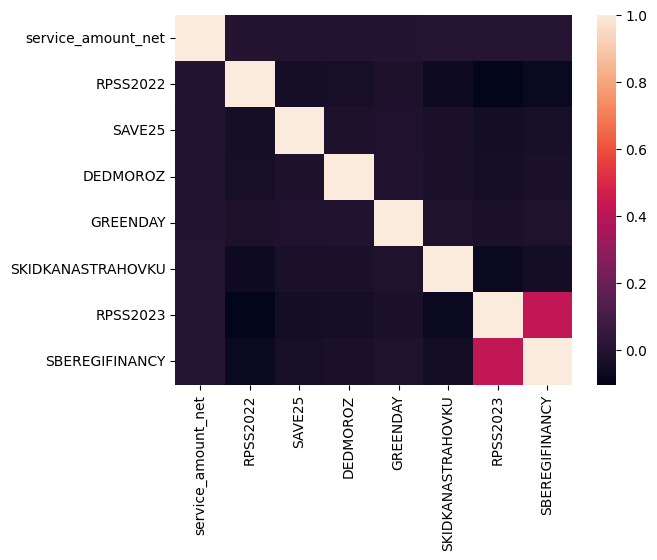

In [45]:
corr = data[num_cols].corr()
sns.heatmap(corr)

In [46]:
import statsmodels.api as sm

In [47]:
akcii = ["RPSS2022", "SAVE25", "DEDMOROZ", "GREENDAY", "SKIDKANASTRAHOVKU", "RPSS2023", "SBEREGIFINANCY"]

In [48]:
X = sm.add_constant(data[['service_amount_net']])
for i in range(len(akcii)):
    y = data[akcii[i]]

    logit_model = sm.Logit(y, X)
    result = logit_model.fit()

    #print(result.summary())
    pseudo_r2 = result.prsquared
    print(f'\n{akcii[i]}: \n')
    print(f"Pseudo R-squared: {pseudo_r2}")

    llr_pvalue = result.llr_pvalue
    print(f"p-value for Likelihood Ratio Test: {llr_pvalue} \n")

Optimization terminated successfully.
         Current function value: 0.285634
         Iterations 6

RPSS2022: 

Pseudo R-squared: 9.252459343134234e-08
p-value for Likelihood Ratio Test: 0.8109224480375623 

Optimization terminated successfully.
         Current function value: 0.100934
         Iterations 8

SAVE25: 

Pseudo R-squared: 0.0001445922985008341
p-value for Likelihood Ratio Test: 1.8838958675137e-08 

Optimization terminated successfully.
         Current function value: 0.080518
         Iterations 8

DEDMOROZ: 

Pseudo R-squared: 6.461937527912909e-05
p-value for Likelihood Ratio Test: 0.0007883092832068398 

Optimization terminated successfully.
         Current function value: 0.032859
         Iterations 9

GREENDAY: 

Pseudo R-squared: 2.120313792575157e-05
p-value for Likelihood Ratio Test: 0.21930966594602896 

Optimization terminated successfully.
         Current function value: 0.174371
         Iterations 7

SKIDKANASTRAHOVKU: 

Pseudo R-squared: 5.351022982

In [49]:
data = data.drop(columns=["RPSS2022", "SAVE25", "DEDMOROZ", "GREENDAY", "SKIDKANASTRAHOVKU", "SBEREGIFINANCY"])

#Подготовка данных к передаче в модель

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

data_linear = data.drop(columns=['service_document_id', 'account_document_id', 'time', 'service_code_median', 'service_name_std', 'service_name_mean', 'service_name_median', 'service_code_std'])

round_to_month = data_linear['service_date'].dt.to_period('M') #.dt.to_timestamp()
data_linear["service_date_month"] = round_to_month.dt.strftime('%Y-%m')

data_linear = data_linear.sort_values(by='service_date')
#data_linear = data_linear.drop(columns=['service_date'])

oe = OrdinalEncoder()
data_linear[['patient_id', 'service_code', 'service_name', 'weekday_name']] = oe.fit_transform(data_linear[['patient_id', 'service_code', 'service_name', 'weekday_name']])

data_linear = data_linear.set_index('service_date') # service_date_month
data_linear['delta_seconds'] = data_linear['delta_time'].dt.total_seconds()
data_linear = data_linear.drop(columns=['delta_time'])

data_linear.index = data_linear.index.floor('H')
data_linear.head()
# data_linear.info()



<ipython-input-52-78ca9f3a6feb>:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_linear.index = data_linear.index.floor('H')


,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,hour,day,weekday_name,weekends,holidays,service_code_mean,correction_count,amount_std,RPSS2023,service_date_month,delta_seconds
service_date,,,,,,,,,,,,,,,,,,,
2022-01-01 12:00:00,1925.0,24359.0,4214.0,1789.0,0,2022,1,2022-01-01,12,1,4.0,1,1,2288.290331,1,0.0,0,2022-01,0.0
2022-01-01 12:00:00,4800.0,1214.0,629.0,833.0,0,2022,1,2022-01-01,12,1,4.0,1,1,5176.288072,1,0.0,0,2022-01,0.0
2022-01-01 12:00:00,1453.5,8207.0,806.0,1000.0,0,2022,1,2022-01-01,12,1,4.0,1,1,1656.989466,1,0.0,0,2022-01,0.0
2022-01-01 12:00:00,331.5,8207.0,468.0,2083.0,0,2022,1,2022-01-01,12,1,4.0,1,1,370.289979,1,0.0,0,2022-01,0.0
2022-01-01 12:00:00,612.0,8207.0,1742.0,1752.0,0,2022,1,2022-01-01,12,1,4.0,1,1,683.473515,1,0.0,0,2022-01,0.0


Агрегирование данных по дням

In [53]:
aggregated_data = data_linear.resample('D').agg({
    'service_amount_net': 'sum',
    'is_hospital': 'sum',
    'weekday_name': 'first',
    'weekends': 'first',
    'holidays': 'first',
    'service_code_mean': 'sum',
    'delta_seconds': 'mean',
    'correction_count': 'sum',
    'amount_std': 'mean',
    'service_date_month': 'first',
    'date': 'first',
    'year': 'first',
    'month': 'first',
    'day': 'first',
})
aggregated_data

,service_amount_net,is_hospital,weekday_name,weekends,holidays,service_code_mean,delta_seconds,correction_count,amount_std,service_date_month,date,year,month,day
service_date,,,,,,,,,,,,,,
2022-01-01,205120.00,0,4.0,1,1,2.023296e+05,0.000000e+00,80,0.000000,2022-01,2022-01-01,2022,1,1
2022-01-02,623327.09,44,0.0,1,1,6.034493e+05,7.795167e+04,350,25.894738,2022-01,2022-01-02,2022,1,2
2022-01-03,1134685.94,14,2.0,0,1,1.123005e+06,2.938890e+05,622,54.051556,2022-01,2022-01-03,2022,1,3
2022-01-04,1121704.72,34,1.0,0,1,1.165825e+06,8.723215e+05,602,48.681750,2022-01,2022-01-04,2022,1,4
2022-01-05,1527609.83,53,5.0,0,1,1.570067e+06,1.099878e+06,877,78.184331,2022-01,2022-01-05,2022,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,4571180.39,112,5.0,0,0,4.419597e+06,0.000000e+00,1702,0.000000,2023-12,2023-12-27,2023,12,27
2023-12-28,3503689.85,64,6.0,0,0,3.401974e+06,0.000000e+00,1458,0.000000,2023-12,2023-12-28,2023,12,28
2023-12-29,3089895.15,34,3.0,0,0,2.940942e+06,0.000000e+00,1317,0.000000,2023-12,2023-12-29,2023,12,29


Добавление колонки с инфляцией

In [54]:
aggregated_data['date'] = pd.to_datetime(aggregated_data['date'])
if 'inflation' in aggregated_data.columns:
    aggregated_data = aggregated_data.drop(columns=['inflation'])
inflation_values = [
    8.73, 9.15, 16.69, 17.83, 17.1, 15.9, 15.1, 14.3, 13.68, 12.63, 11.98, 11.94,
    11.77, 10.99, 3.51, 2.31, 2.51, 3.25, 4.3, 5.15, 6, 6.69, 7.48, 7.42, 7.44
]
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2024-01-01')
monthly_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
inflation_df = pd.DataFrame({
    'date': monthly_dates,
    'inflation': inflation_values
})
aggregated_data = pd.merge(left=aggregated_data, right=inflation_df, on='date', how='outer')
aggregated_data['inflation'] = aggregated_data['inflation'].interpolate(method='linear', limit_direction='backward')
aggregated_data = aggregated_data[:-1]
aggregated_data['service_date'] = aggregated_data['date']
aggregated_data.set_index('service_date', inplace=True)
aggregated_data

,service_amount_net,is_hospital,weekday_name,weekends,holidays,service_code_mean,delta_seconds,correction_count,amount_std,service_date_month,date,year,month,day,inflation
service_date,,,,,,,,,,,,,,,
2022-01-01,205120.00,0.0,4.0,1.0,1.0,2.023296e+05,0.000000e+00,80.0,0.000000,2022-01,2022-01-01,2022.0,1.0,1.0,8.730000
2022-01-02,623327.09,44.0,0.0,1.0,1.0,6.034493e+05,7.795167e+04,350.0,25.894738,2022-01,2022-01-02,2022.0,1.0,2.0,8.743548
2022-01-03,1134685.94,14.0,2.0,0.0,1.0,1.123005e+06,2.938890e+05,622.0,54.051556,2022-01,2022-01-03,2022.0,1.0,3.0,8.757097
2022-01-04,1121704.72,34.0,1.0,0.0,1.0,1.165825e+06,8.723215e+05,602.0,48.681750,2022-01,2022-01-04,2022.0,1.0,4.0,8.770645
2022-01-05,1527609.83,53.0,5.0,0.0,1.0,1.570067e+06,1.099878e+06,877.0,78.184331,2022-01,2022-01-05,2022.0,1.0,5.0,8.784194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,4571180.39,112.0,5.0,0.0,0.0,4.419597e+06,0.000000e+00,1702.0,0.000000,2023-12,2023-12-27,2023.0,12.0,27.0,7.436774
2023-12-28,3503689.85,64.0,6.0,0.0,0.0,3.401974e+06,0.000000e+00,1458.0,0.000000,2023-12,2023-12-28,2023.0,12.0,28.0,7.437419
2023-12-29,3089895.15,34.0,3.0,0.0,0.0,2.940942e+06,0.000000e+00,1317.0,0.000000,2023-12,2023-12-29,2023.0,12.0,29.0,7.438065


Загрузка файла с информацией о ценах акций Сбера

In [55]:
!gdown 1ui20hkU7VytT7HIa1B0EssK3rd5gQyTz

Downloading...
From: https://drive.google.com/uc?id=1ui20hkU7VytT7HIa1B0EssK3rd5gQyTz
To: /content/SBER.csv
100% 32.7k/32.7k [00:00<00:00, 52.3MB/s]


Добавление колонки с ценами акций Сбера

In [56]:
if 'stock_price' in aggregated_data.columns:
    aggregated_data = aggregated_data.drop(columns=['stock_price'])
import pandas as pd
file_path = '/content/SBER.csv'
stock_data = pd.read_csv(file_path)
stock_data['Дата'] = pd.to_datetime(stock_data['Дата'], format='%d.%m.%Y')
stock_data = stock_data.rename(columns={'Цена': 'stock_price'})
stock_data = stock_data[['Дата', 'stock_price']]
stock_data = stock_data.rename(columns={'Дата': 'date'})
stock_data['stock_price'] = stock_data['stock_price'].str.replace(',', '.', regex=False).astype(float)
time_df = pd.DataFrame({'date': pd.date_range(start='2021-12-30', end='2024-01-01', freq='D')})
time_df = time_df.merge(stock_data, on='date', how='left')
time_df['stock_price'] = time_df['stock_price'].interpolate(method='linear')
time_df = time_df[time_df['date'].between('2022-01-01', '2023-12-31')]
aggregated_data = pd.merge(left=aggregated_data, right=time_df, on='date', how='left')
aggregated_data['service_date'] = aggregated_data['date']
aggregated_data.set_index('service_date', inplace=True)
aggregated_data

,service_amount_net,is_hospital,weekday_name,weekends,holidays,service_code_mean,delta_seconds,correction_count,amount_std,service_date_month,date,year,month,day,inflation,stock_price
service_date,,,,,,,,,,,,,,,,
2022-01-01,205120.00,0.0,4.0,1.0,1.0,2.023296e+05,0.000000e+00,80.0,0.000000,2022-01,2022-01-01,2022.0,1.0,1.0,8.730000,299.480
2022-01-02,623327.09,44.0,0.0,1.0,1.0,6.034493e+05,7.795167e+04,350.0,25.894738,2022-01,2022-01-02,2022.0,1.0,2.0,8.743548,302.475
2022-01-03,1134685.94,14.0,2.0,0.0,1.0,1.123005e+06,2.938890e+05,622.0,54.051556,2022-01,2022-01-03,2022.0,1.0,3.0,8.757097,305.470
2022-01-04,1121704.72,34.0,1.0,0.0,1.0,1.165825e+06,8.723215e+05,602.0,48.681750,2022-01,2022-01-04,2022.0,1.0,4.0,8.770645,304.240
2022-01-05,1527609.83,53.0,5.0,0.0,1.0,1.570067e+06,1.099878e+06,877.0,78.184331,2022-01,2022-01-05,2022.0,1.0,5.0,8.784194,287.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,4571180.39,112.0,5.0,0.0,0.0,4.419597e+06,0.000000e+00,1702.0,0.000000,2023-12,2023-12-27,2023.0,12.0,27.0,7.436774,271.080
2023-12-28,3503689.85,64.0,6.0,0.0,0.0,3.401974e+06,0.000000e+00,1458.0,0.000000,2023-12,2023-12-28,2023.0,12.0,28.0,7.437419,271.740
2023-12-29,3089895.15,34.0,3.0,0.0,0.0,2.940942e+06,0.000000e+00,1317.0,0.000000,2023-12,2023-12-29,2023.0,12.0,29.0,7.438065,270.820


Добавление колонки с сезонной акцией СберСтрахования

In [57]:
def add_rpss2023(date):
    return 1 if pd.Timestamp("2023-06-13") <= date <= pd.Timestamp("2023-08-31") else 0
aggregated_data["RPSS2023"] = aggregated_data["date"].apply(add_rpss2023)
aggregated_data.head()

,service_amount_net,is_hospital,weekday_name,weekends,holidays,service_code_mean,delta_seconds,correction_count,amount_std,service_date_month,date,year,month,day,inflation,stock_price,RPSS2023
service_date,,,,,,,,,,,,,,,,,
2022-01-01,205120.00,0.0,4.0,1.0,1.0,2.023296e+05,0.000000e+00,80.0,0.000000,2022-01,2022-01-01,2022.0,1.0,1.0,8.730000,299.480,0
2022-01-02,623327.09,44.0,0.0,1.0,1.0,6.034493e+05,7.795167e+04,350.0,25.894738,2022-01,2022-01-02,2022.0,1.0,2.0,8.743548,302.475,0
2022-01-03,1134685.94,14.0,2.0,0.0,1.0,1.123005e+06,2.938890e+05,622.0,54.051556,2022-01,2022-01-03,2022.0,1.0,3.0,8.757097,305.470,0
2022-01-04,1121704.72,34.0,1.0,0.0,1.0,1.165825e+06,8.723215e+05,602.0,48.681750,2022-01,2022-01-04,2022.0,1.0,4.0,8.770645,304.240,0
2022-01-05,1527609.83,53.0,5.0,0.0,1.0,1.570067e+06,1.099878e+06,877.0,78.184331,2022-01,2022-01-05,2022.0,1.0,5.0,8.784194,287.010,0


In [58]:
aggregated_data.isna().sum()

,0
service_amount_net,0
is_hospital,0
weekday_name,0
weekends,0
holidays,0
service_code_mean,0
delta_seconds,0
correction_count,0
amount_std,0
service_date_month,0


In [59]:
print(aggregated_data.index.duplicated().sum())

0


In [60]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2022-01-01 to 2023-12-31
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   service_amount_net  730 non-null    float64       
 1   is_hospital         730 non-null    float64       
 2   weekday_name        730 non-null    float64       
 3   weekends            730 non-null    float64       
 4   holidays            730 non-null    float64       
 5   service_code_mean   730 non-null    float64       
 6   delta_seconds       730 non-null    float64       
 7   correction_count    730 non-null    float64       
 8   amount_std          730 non-null    float64       
 9   service_date_month  730 non-null    object        
 10  date                730 non-null    datetime64[ns]
 11  year                730 non-null    float64       
 12  month               730 non-null    float64       
 13  day                 730 non-nul

In [61]:
aggregated_data['service_amount_net'].mean()

3493863.6532054795

Матрица корреляций колонок aggregated_data

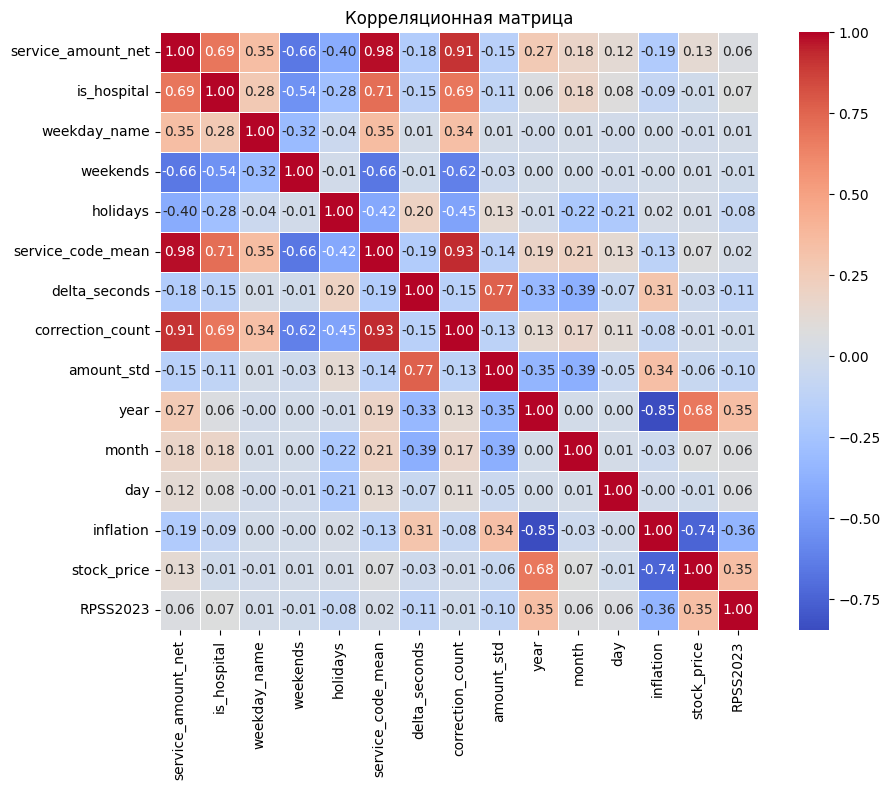

In [62]:
columns_to_exclude = ['service_document_id', 'account_document_id', 'service_date', 'date', 'time', 'patient_id', 'service_code', 'service_name', 'weekday_name',]
data_reduced = aggregated_data.drop(columns=['date', 'service_date_month'])

correlation_matrix = data_reduced.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    linewidths=0.5
)
plt.title("Корреляционная матрица")
plt.tight_layout()
plt.show()

Матрица phik-корреляций колонок aggregated_data

interval columns not set, guessing: ['service_amount_net', 'is_hospital', 'weekday_name', 'weekends', 'holidays', 'service_code_mean', 'delta_seconds', 'correction_count', 'amount_std', 'year', 'month', 'day', 'inflation', 'stock_price', 'RPSS2023']


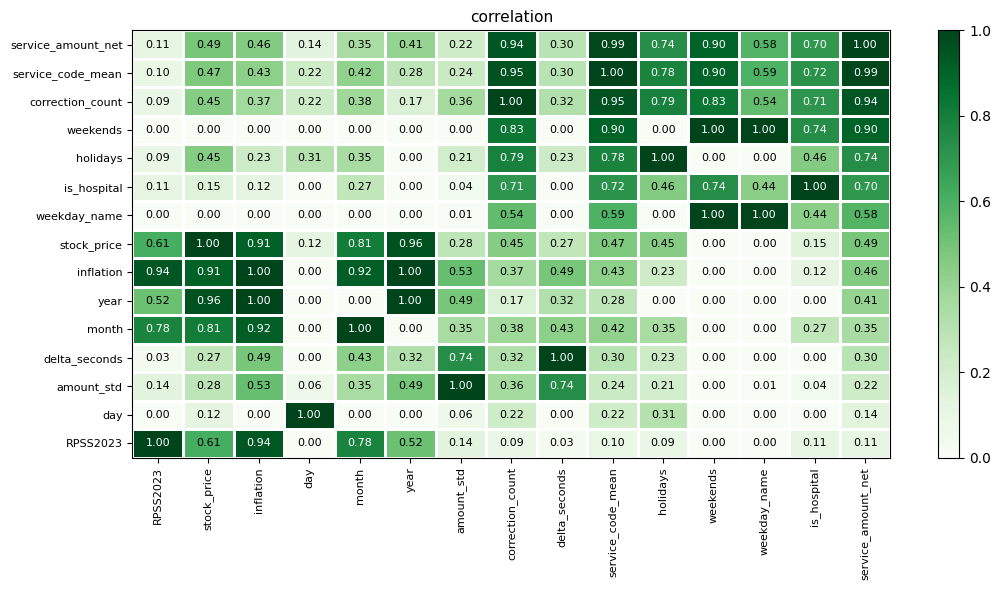

In [63]:
p_o = aggregated_data.drop(columns=['date', 'service_date_month']).phik_matrix().round(2).sort_values('service_amount_net')

plot_correlation_matrix(p_o.values,
                        x_labels=p_o.columns,
                        y_labels=p_o.index,
                        vmin=0,
                        vmax=1,
                        color_map="Greens",
                        fontsize_factor=0.8,
                        figsize=(11, 6)
                        )
plt.tight_layout()

Исследование service_amount_net на стационарность

Критерий Дики-Фуллера: p=0.006599


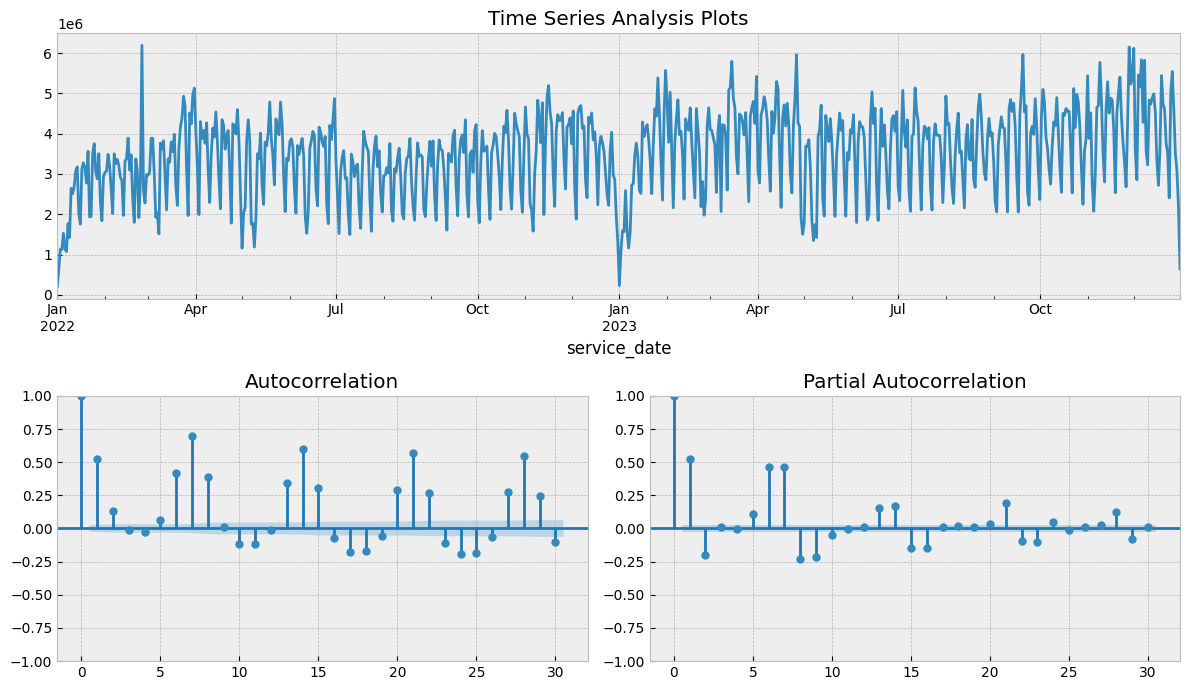

In [64]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt


def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return

tsplot(aggregated_data['service_amount_net'], lags=30)

#Первый прототип модели

Прототип модели SARIMAX

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -332.510
Date:                Mon, 31 Mar 2025   AIC                            675.020
Time:                        02:06:12   BIC                            694.520
Sample:                             0   HQIC                           682.769
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6496      0.032    -20.490      0.000      -0.712      -0.587
x2             0.1635      0.090      1.816      0.069      -0.013       0.340
ar.L1          0.8179      0.048     16.928      0.0

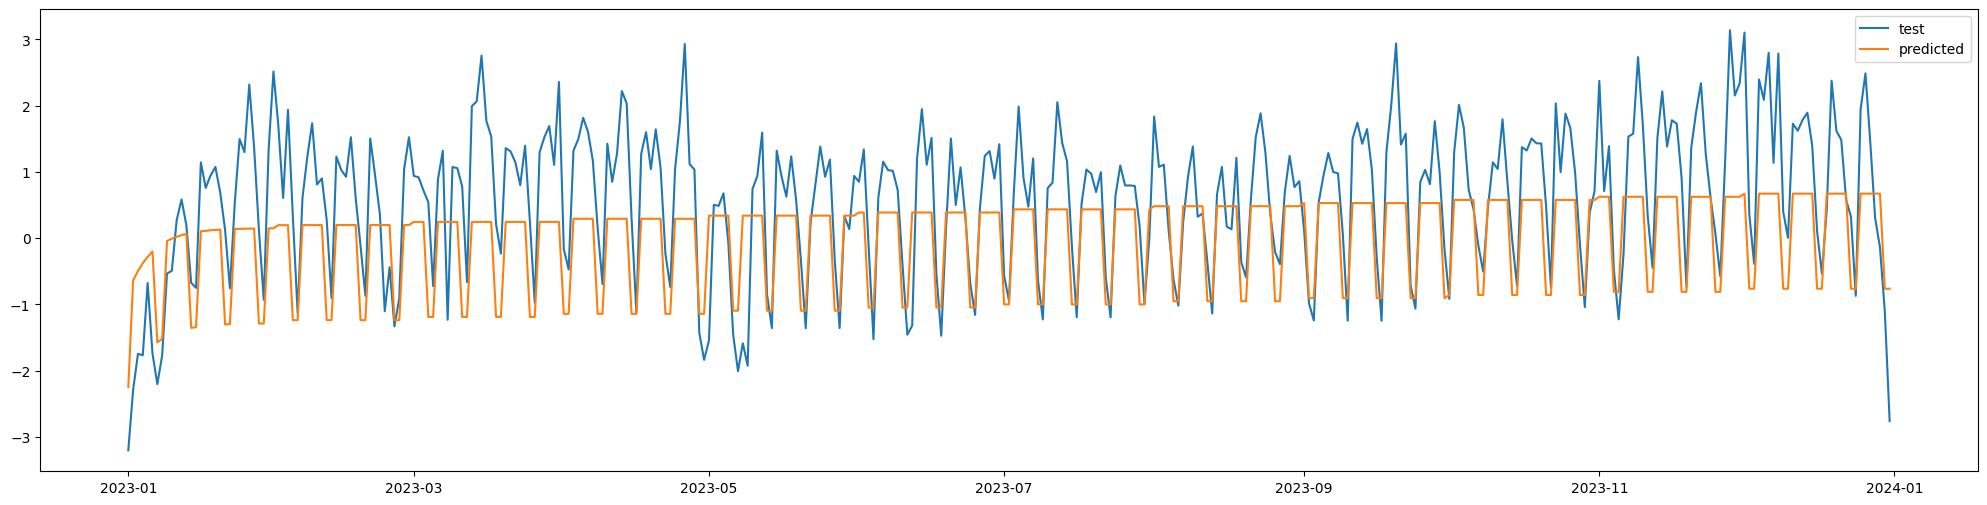

In [65]:
# 0   service_amount_net  730 non-null    float64  goal
#  1   is_hospital         730 non-null    int64   ??
#  2   weekday_name        730 non-null    float64 -
#  3   weekends            730 non-null    int64   +
#  4   holidays            730 non-null    int64   -
#  5   service_code_mean   730 non-null    float64 ???
#  6   delta_seconds       730 non-null    float64 +?
#  7   correction_count    730 non-null    int64   +
#  8   amount_std          730 non-null    float64 ???
#  9   service_date_month  730 non-null    object  -
#  10  date                730 non-null    object  -
#  11  year                730 non-null    int32   -
#  12  month               730 non-null    int32   +
#  13  day                 730 non-null    int32   -
#  14  RPSS2023            730 non-null    int64   ??
#      iflation                                    ?
#      akcii                                       ?

unique_months = aggregated_data['service_date_month'].unique()

train_months = unique_months[:12]
test_months = unique_months[-12:]

X_train = aggregated_data[aggregated_data['service_date_month'].isin(train_months)]
X_test = aggregated_data[aggregated_data['service_date_month'].isin(test_months)]

X_train.drop(columns=['service_date_month'])
X_test.drop(columns=['service_date_month'])

y_train = X_train[['service_amount_net']]
y_test = X_test[['service_amount_net']]

X_train_ex=X_train[['weekends','month', ]]
X_test_ex=X_test[['weekends', 'month', ]]

sd = StandardScaler()
X_train_ex = sd.fit_transform(X_train_ex)
X_test_ex = sd.transform(X_test_ex)

y_train = sd.fit_transform(y_train)
y_test = sd.transform(y_test)

mod = SARIMAX(y_train,
              exog=X_train_ex,
              order=(1, 0, 1), # 1, 0, 4
              trend=[0, 0], # 1, 0
              seasonal_order=(0, 0, 0, 12) # 1, 1, 1
              )

res = mod.fit()
print(res.summary())
forecast = res.forecast(steps=X_test.shape[0], exog=X_test_ex) #

plt.figure(figsize=(25, 6))

plt.plot(X_test.index, y_test, label='test')
plt.plot(X_test.index, forecast, label='predicted')
plt.legend()
plt.show()

In [66]:
(sd.inverse_transform(forecast.reshape(-1, 1)) < 0).sum()

0

In [67]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit

In [68]:
mse = mean_squared_error(sd.inverse_transform(y_test.reshape(-1, 1)), sd.inverse_transform(forecast.reshape(-1, 1)))
mae = mean_absolute_error(sd.inverse_transform(y_test.reshape(-1, 1)), sd.inverse_transform(forecast.reshape(-1, 1)))
mape = mean_absolute_percentage_error(sd.inverse_transform(y_test.reshape(-1, 1)), sd.inverse_transform(forecast.reshape(-1, 1)))

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

MSE: 821728887461.1128
MAE: 748518.4563146095
MAPE: 0.21801633182445002


In [69]:
X_month = X_test[['service_amount_net', 'service_date_month']]
X_month['forecast'] = sd.inverse_transform(forecast.reshape(-1, 1))
X_month_agg = X_month.groupby('service_date_month').agg({
    'service_amount_net': 'sum',
    'forecast': 'sum'
})
print('MAE: ', mean_absolute_error(X_month_agg['service_amount_net'], X_month_agg['forecast']))
print('MAPE: ', mean_absolute_percentage_error(X_month_agg['service_amount_net'], X_month_agg['forecast']))

MAE:  17100664.742714807
MAPE:  0.14554722416644097


<ipython-input-69-c66ff6650b19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_month['forecast'] = sd.inverse_transform(forecast.reshape(-1, 1))


#Предсказание переменных для итоговой модели

In [70]:
from catboost import CatBoostRegressor

Проверка delta_seconds на стационарность

Критерий Дики-Фуллера: p=0.002095


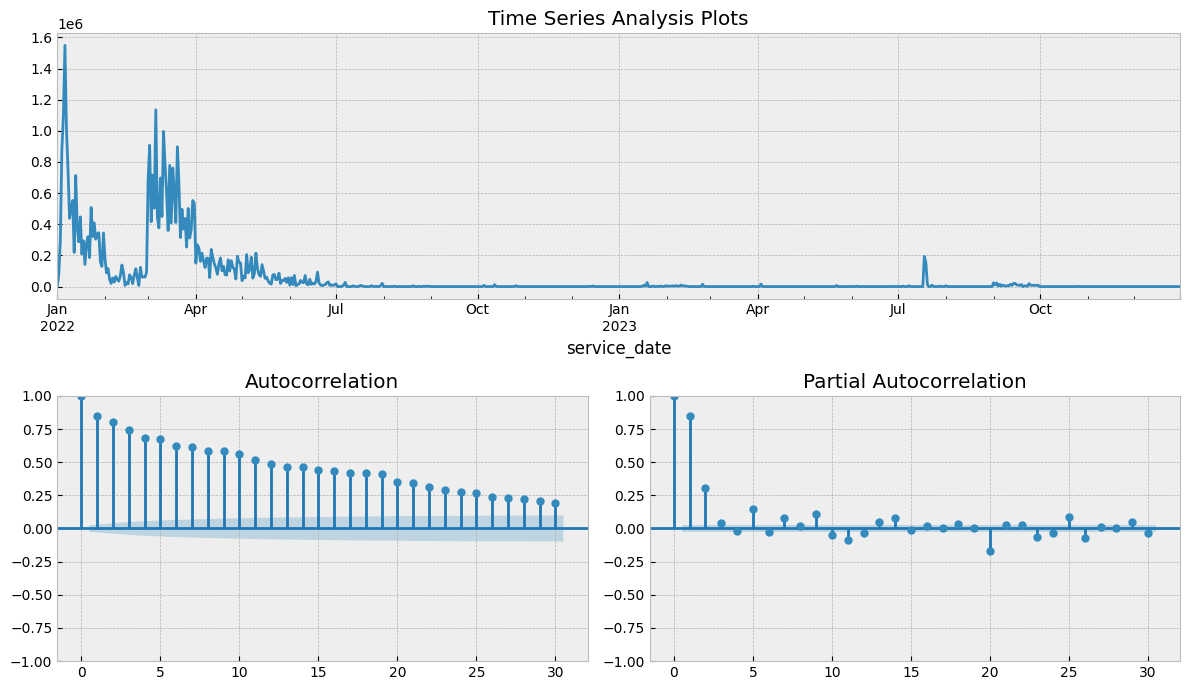

In [71]:
tsplot(aggregated_data['delta_seconds'], lags=30)

Предсказание delta_seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -283.905
Date:                Mon, 31 Mar 2025   AIC                            583.811
Time:                        02:06:14   BIC                            615.010
Sample:                             0   HQIC                           596.210
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0069      0.039     -0.174      0.862      -0.084       0.070
x2            -0.5441      0.183     -2.978      0.003      -0.902      -0.186
x3            -0.0464      0.034     -1.381      0.1

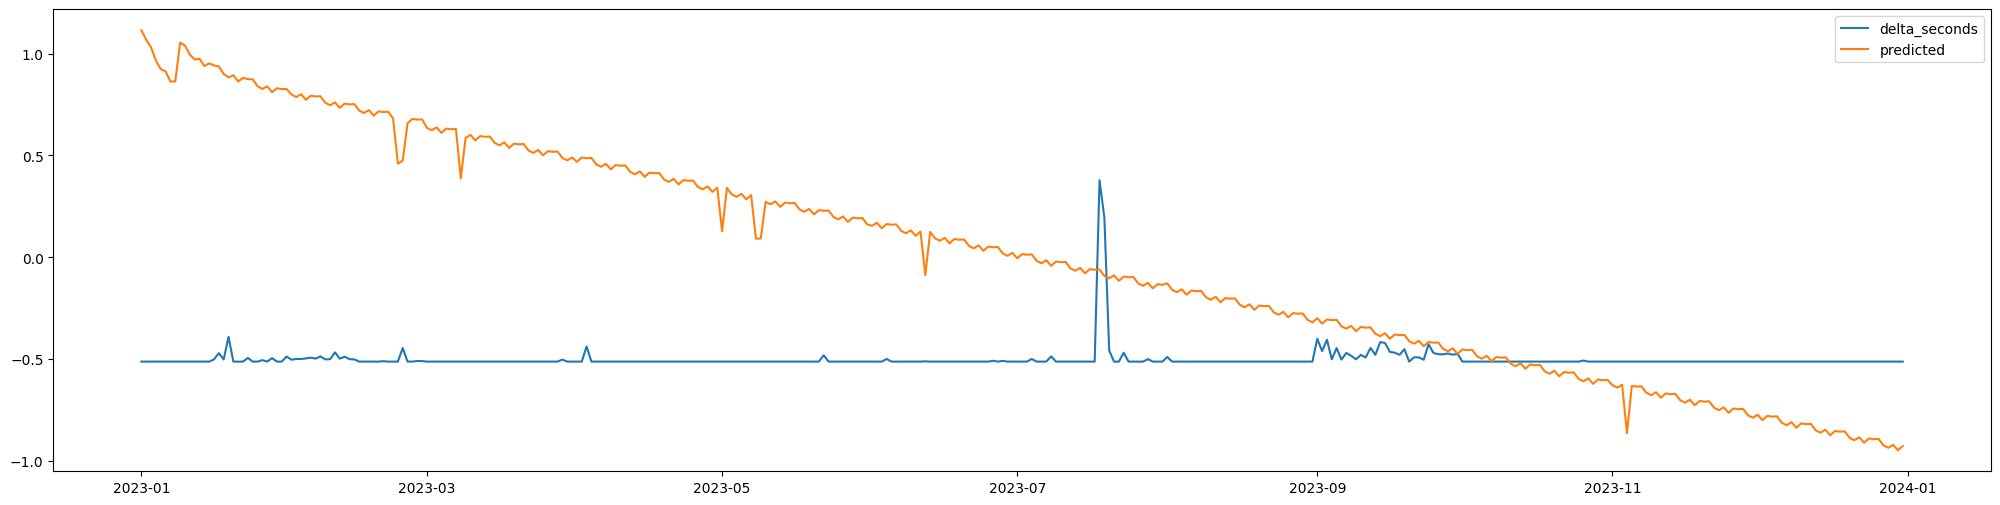

In [72]:
unique_months = aggregated_data['service_date_month'].unique()

#  2   weekday_name        730 non-null    float64   +
#  3   weekends            730 non-null    float64   +
#  4   holidays            730 non-null    float64   +
#  11  year                730 non-null    float64   -
#  12  month               730 non-null    float64   +
#  13  day                 730 non-null    float64   +
#  14  inflation           730 non-null    float64   -
#  15  RPSS2023            730 non-null    int64     -
#  16  stock_price         730 non-null    float64   -

train_months = unique_months[:12]
test_months = unique_months[-12:]

X_code_mean_train = aggregated_data[aggregated_data['service_date_month'].isin(train_months)]
X_code_mean_test = aggregated_data[aggregated_data['service_date_month'].isin(test_months)]

X_code_mean_train.drop(columns=['service_date_month'])
X_code_mean_test.drop(columns=['service_date_month'])

y_code_mean_train = X_code_mean_train[['delta_seconds']]
y_code_mean_test = X_code_mean_test[['delta_seconds']]

X_code_mean_train_ex=X_code_mean_train[['weekends', 'month', 'day', 'weekday_name', 'holidays']]
X_code_mean_test_ex=X_code_mean_test[['weekends', 'month', 'day', 'weekday_name', 'holidays']]

sd = StandardScaler()
X_code_mean_train_ex = sd.fit_transform(X_code_mean_train_ex)
X_code_mean_test_ex = sd.transform(X_code_mean_test_ex)

y_code_mean_train = sd.fit_transform(y_code_mean_train)
y_code_mean_test = sd.transform(y_code_mean_test)

model_code_mean = SARIMAX(y_code_mean_train,
              exog=X_code_mean_train_ex,
              order=(1, 0, 1), # 1, 0, 4
              trend=[0, 0], # 1, 0
              seasonal_order=(0, 0, 0, 12) # 1, 1, 1
              )

res_code_mean = model_code_mean.fit()
print(res_code_mean.summary())
forecast_code_mean = res_code_mean.forecast(steps=X_code_mean_test.shape[0], exog=X_code_mean_test_ex) #

plt.figure(figsize=(25, 6))

plt.plot(X_code_mean_test.index, y_code_mean_test, label='delta_seconds')
plt.plot(X_code_mean_test.index, forecast_code_mean, label='predicted')
plt.legend()
plt.show()

In [73]:
mse = mean_squared_error(sd.inverse_transform(y_code_mean_test.reshape(-1, 1)), sd.inverse_transform(forecast_code_mean.reshape(-1, 1)))
mae = mean_absolute_error(sd.inverse_transform(y_code_mean_test.reshape(-1, 1)), sd.inverse_transform(forecast_code_mean.reshape(-1, 1)))
mape = mean_absolute_percentage_error(sd.inverse_transform(y_code_mean_test.reshape(-1, 1)), sd.inverse_transform(forecast_code_mean.reshape(-1, 1)))

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

MSE: 27106234979.7564
MAE: 133212.99117604695
MAPE: 4.823831684060815e+20


In [74]:
mae_scores = []
mape_scores = []

tscv = TimeSeriesSplit(n_splits=6)
# 0   service_amount_net  730 non-null    float64       cel
#  1   is_hospital         730 non-null    float64       +
#  2   weekday_name        730 non-null    float64       -
#  3   weekends            730 non-null    float64       +
#  4   holidays            730 non-null    float64       -
#  5   service_code_mean   730 non-null    float64       +
#  6   delta_seconds       730 non-null    float64       -
#  7   correction_count    730 non-null    float64       +
#  8   amount_std          730 non-null    float64       +
#  9   service_date_month  730 non-null    object        -
#  10  date                730 non-null    datetime64    -
#  11  year                730 non-null    float64       +
#  12  month               730 non-null    float64       -
#  13  day                 730 non-null    float64       -
#  14  inflation           730 non-null    float64       +
#  15  RPSS2023            730 non-null    int64         -
#  16  stock_price         730 non-null    float64       +

for train_index, test_index in tscv.split(aggregated_data):

    X_train_cv_serv_code, X_test_cv_serv_code = aggregated_data.iloc[train_index], aggregated_data.iloc[test_index]

    y_train_cv_serv_code = X_train_cv_serv_code[['delta_seconds']]
    y_test_cv_serv_code = X_test_cv_serv_code[['delta_seconds']]

    X_train_ex_cv_serv_code = X_train_cv_serv_code[[ 'month', 'holidays', 'year']]
    X_test_ex_cv_serv_code = X_test_cv_serv_code[[ 'month', 'holidays', 'year']]

    cat_model_serv_code = CatBoostRegressor(
        depth=10, # 6
        iterations= 1500, #700
        l2_leaf_reg=1,
        learning_rate= 0.0001
    )

    y_serv_code_train_log = np.log1p(y_train_cv_serv_code)
    y_serv_code_test_log = np.log1p(y_test_cv_serv_code)

    cat_model_serv_code.fit(X_train_ex_cv_serv_code, y_serv_code_train_log)
    predict_cat_model_log_serv_code = cat_model_serv_code.predict(X_test_ex_cv_serv_code)


    predict_cat_model_serv_code = np.expm1(predict_cat_model_log_serv_code)
    mae = mean_absolute_error(y_test_cv_serv_code, predict_cat_model_serv_code)
    mape = mean_absolute_percentage_error(y_test_cv_serv_code, predict_cat_model_serv_code)

    mae_scores.append(mae)
    mape_scores.append(mape)

print(f'Среднее MAE: {np.mean(mae_scores)}')
print(f'Среднее MAPE: {np.mean(mape_scores)}')

Выходные данные были обрезаны до нескольких последних строк (5000).
1002:	learn: 5.0831981	total: 111ms	remaining: 54.9ms
1003:	learn: 5.0828074	total: 111ms	remaining: 54.8ms
1004:	learn: 5.0824055	total: 111ms	remaining: 54.6ms
1005:	learn: 5.0820034	total: 111ms	remaining: 54.5ms
1006:	learn: 5.0816125	total: 111ms	remaining: 54.5ms
1007:	learn: 5.0812574	total: 111ms	remaining: 54.4ms
1008:	learn: 5.0808692	total: 112ms	remaining: 54.3ms
1009:	learn: 5.0804675	total: 112ms	remaining: 54.2ms
1010:	learn: 5.0800845	total: 112ms	remaining: 54.3ms
1011:	learn: 5.0796963	total: 113ms	remaining: 54.3ms
1012:	learn: 5.0793082	total: 113ms	remaining: 54.1ms
1013:	learn: 5.0789149	total: 113ms	remaining: 54ms
1014:	learn: 5.0785225	total: 113ms	remaining: 53.9ms
1015:	learn: 5.0781190	total: 113ms	remaining: 53.9ms
1016:	learn: 5.0777412	total: 113ms	remaining: 53.8ms
1017:	learn: 5.0773449	total: 113ms	remaining: 53.7ms
1018:	learn: 5.0769570	total: 114ms	remaining: 53.8ms
1019:	learn: 5.0

0:	learn: 5.6323039	total: 366us	remaining: 256ms
1:	learn: 5.5873070	total: 675us	remaining: 236ms
2:	learn: 5.5431643	total: 934us	remaining: 217ms
3:	learn: 5.5028110	total: 1.2ms	remaining: 209ms
4:	learn: 5.4615700	total: 1.44ms	remaining: 200ms
5:	learn: 5.4232814	total: 1.68ms	remaining: 195ms
6:	learn: 5.3838293	total: 1.93ms	remaining: 191ms
7:	learn: 5.3427142	total: 2.19ms	remaining: 189ms
8:	learn: 5.3032441	total: 2.42ms	remaining: 186ms
9:	learn: 5.2632781	total: 2.64ms	remaining: 182ms
10:	learn: 5.2246390	total: 2.89ms	remaining: 181ms
11:	learn: 5.1859120	total: 3.11ms	remaining: 178ms
12:	learn: 5.1450018	total: 3.34ms	remaining: 176ms
13:	learn: 5.1047448	total: 3.52ms	remaining: 172ms
14:	learn: 5.0664767	total: 3.75ms	remaining: 171ms
15:	learn: 5.0279612	total: 3.92ms	remaining: 168ms
16:	learn: 4.9901351	total: 4.15ms	remaining: 167ms
17:	learn: 4.9536265	total: 4.38ms	remaining: 166ms
18:	learn: 4.9178437	total: 4.62ms	remaining: 165ms
19:	learn: 4.8814849	total

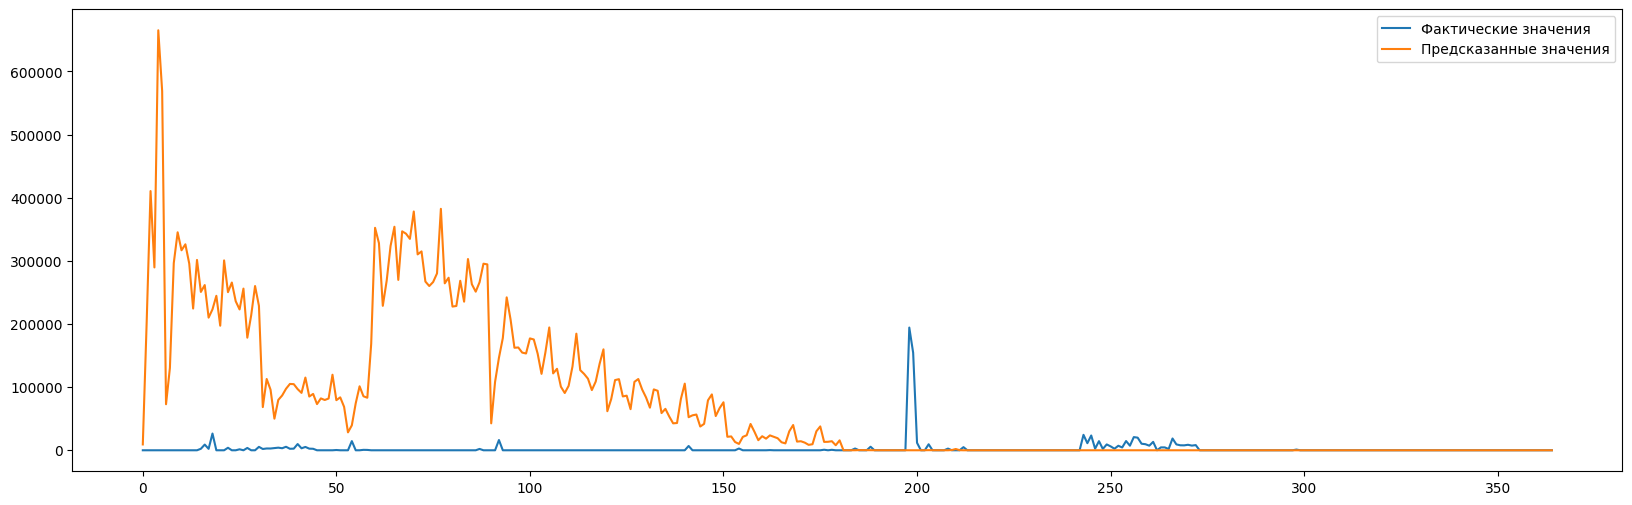

MAE: 74685.64228052956
MAPE: 2.815368466182928e+20


In [75]:
unique_months = aggregated_data['service_date_month'].unique()

train_months = unique_months[:12]
test_months = unique_months[-12:]

X_code_mean_train = aggregated_data[aggregated_data['service_date_month'].isin(train_months)]
X_code_mean_test = aggregated_data[aggregated_data['service_date_month'].isin(test_months)]

X_code_mean_train.drop(columns=['service_date_month'])
X_code_mean_test.drop(columns=['service_date_month'])

y_code_mean_train = X_code_mean_train[['delta_seconds']]
y_code_mean_test = X_code_mean_test[['delta_seconds']]

X_code_mean_train_ex=X_code_mean_train[['weekends', 'month', 'day', 'weekday_name', 'holidays', ]]
X_code_mean_test_ex=X_code_mean_test[['weekends', 'month', 'day', 'weekday_name', 'holidays', ]]

# sd = StandardScaler()
# X_code_mean_train_ex = sd.fit_transform(X_code_mean_train_ex)
# X_code_mean_test_ex = sd.transform(X_code_mean_test_ex)

# y_code_mean_train = sd.fit_transform(y_code_mean_train)
# y_code_mean_test = sd.transform(y_code_mean_test)

cat_model = CatBoostRegressor(
     depth=6, # 6
     iterations= 700, #700
     l2_leaf_reg=2,
     learning_rate= 0.01
)


y_code_mean_train_log = np.log1p(y_code_mean_train)
y_code_mean_test_log = np.log1p(y_code_mean_test)

cat_model.fit(X_code_mean_train_ex, y_code_mean_train_log)
predict_cat_model_log = cat_model.predict(X_code_mean_test_ex)


predict_cat_model = np.expm1(predict_cat_model_log)
mae = mean_absolute_error(y_code_mean_test, predict_cat_model)
mape = mean_absolute_percentage_error(y_code_mean_test, predict_cat_model)

plt.figure(figsize=(20, 6))
plt.plot(y_code_mean_test.values, label='Фактические значения')
plt.plot(predict_cat_model, label='Предсказанные значения')
plt.legend()
plt.show()

print(f'MAE: {mae}')
print(f'MAPE: {mape}')

Предсказание correction_count

In [76]:
mae_scores = []
mape_scores = []

tscv = TimeSeriesSplit(n_splits=6)
# 0   service_amount_net  730 non-null    float64       cel
#  1   is_hospital         730 non-null    float64       +
#  2   weekday_name        730 non-null    float64       -
#  3   weekends            730 non-null    float64       +
#  4   holidays            730 non-null    float64       -
#  5   service_code_mean   730 non-null    float64       +
#  6   delta_seconds       730 non-null    float64       -
#  7   correction_count    730 non-null    float64       +
#  8   amount_std          730 non-null    float64       +
#  9   service_date_month  730 non-null    object        -
#  10  date                730 non-null    datetime64    -
#  11  year                730 non-null    float64       +
#  12  month               730 non-null    float64       -
#  13  day                 730 non-null    float64       -
#  14  inflation           730 non-null    float64       +
#  15  RPSS2023            730 non-null    int64         -
#  16  stock_price         730 non-null    float64       +

for train_index, test_index in tscv.split(aggregated_data):

    X_train_cv, X_test_cv = aggregated_data.iloc[train_index], aggregated_data.iloc[test_index]

    y_train_cv = X_train_cv[['correction_count']]
    y_test_cv = X_test_cv[['correction_count']]


    X_train_ex_cv = X_train_cv[['weekends', 'month', 'day', 'weekday_name', 'holidays',]]
    X_test_ex_cv = X_test_cv[['weekends', 'month', 'day', 'weekday_name', 'holidays',]]

    sd = StandardScaler()
    X_train_ex_cv = sd.fit_transform(X_train_ex_cv)
    X_test_ex_cv = sd.transform(X_test_ex_cv)

    y_train_cv_scaled = sd.fit_transform(y_train_cv)
    y_test_cv_scaled = sd.transform(y_test_cv)


    mod = SARIMAX(
        y_train_cv_scaled,
        exog=X_train_ex_cv,
        order=(1, 0, 1),
        trend=[0, 0],
        seasonal_order=(0, 0, 0, 12),
    )
    res = mod.fit(disp=False)


    forecast_cv = res.forecast(steps=len(X_test_cv), exog=X_test_ex_cv)


    y_test_cv_original = sd.inverse_transform(y_test_cv_scaled.reshape(-1, 1))
    forecast_cv_original = sd.inverse_transform(forecast_cv.reshape(-1, 1))


    mae = mean_absolute_error(y_test_cv_original, forecast_cv_original)
    mape = mean_absolute_percentage_error(y_test_cv_original, forecast_cv_original)


    mae_scores.append(mae)
    mape_scores.append(mape)


print(f'Среднее MAE: {np.mean(mae_scores)}')
print(f'Среднее MAPE: {np.mean(mape_scores)}')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Среднее MAE: 242.44062235530842
Среднее MAPE: 0.1880661170574598


In [77]:
mae_scores = []
mape_scores = []

tscv = TimeSeriesSplit(n_splits=6)
# 0   service_amount_net  730 non-null    float64       cel
#  1   is_hospital         730 non-null    float64       +
#  2   weekday_name        730 non-null    float64       -
#  3   weekends            730 non-null    float64       +
#  4   holidays            730 non-null    float64       -
#  5   service_code_mean   730 non-null    float64       +
#  6   delta_seconds       730 non-null    float64       -
#  7   correction_count    730 non-null    float64       +
#  8   amount_std          730 non-null    float64       +
#  9   service_date_month  730 non-null    object        -
#  10  date                730 non-null    datetime64    -
#  11  year                730 non-null    float64       +
#  12  month               730 non-null    float64       -
#  13  day                 730 non-null    float64       -
#  14  inflation           730 non-null    float64       +
#  15  RPSS2023            730 non-null    int64         -
#  16  stock_price         730 non-null    float64       +

for train_index, test_index in tscv.split(aggregated_data):

    X_train_cv_cor_count, X_test_cv_cor_count = aggregated_data.iloc[train_index], aggregated_data.iloc[test_index]

    y_train_cv_cor_count = X_train_cv_cor_count[['correction_count']]
    y_test_cv_cor_count = X_test_cv_cor_count[['correction_count']]

    X_train_ex_cv_cor_count = X_train_cv_cor_count[['weekends', 'month', 'day', 'weekday_name', 'holidays', 'year', 'RPSS2023']]
    X_test_ex_cv_cor_count = X_test_cv_cor_count[['weekends', 'month', 'day', 'weekday_name', 'holidays', 'year', 'RPSS2023']]

    cat_model = CatBoostRegressor(
        depth=6, # 6
        iterations= 600, #700
        l2_leaf_reg=3,
        learning_rate= 0.01
    )

    y_code_mean_train_log = np.log1p(y_train_cv_cor_count)
    y_code_mean_test_log = np.log1p(y_test_cv_cor_count)

    cat_model.fit(X_train_ex_cv_cor_count, y_code_mean_train_log)
    predict_cat_model_log = cat_model.predict(X_test_ex_cv_cor_count)

    predict_cat_model = np.expm1(predict_cat_model_log)
    mae = mean_absolute_error(y_test_cv_cor_count, predict_cat_model)
    mape = mean_absolute_percentage_error(y_test_cv_cor_count, predict_cat_model)

    mae_scores.append(mae)
    mape_scores.append(mape)


print(f'Среднее MAE: {np.mean(mae_scores)}')
print(f'Среднее MAPE: {np.mean(mape_scores)}')

0:	learn: 0.4001479	total: 2.07ms	remaining: 1.24s
1:	learn: 0.3983218	total: 13.4ms	remaining: 4.01s
2:	learn: 0.3966820	total: 13.6ms	remaining: 2.7s
3:	learn: 0.3954307	total: 13.9ms	remaining: 2.07s
4:	learn: 0.3938172	total: 14ms	remaining: 1.67s
5:	learn: 0.3924317	total: 14.1ms	remaining: 1.4s
6:	learn: 0.3912101	total: 14.3ms	remaining: 1.22s
7:	learn: 0.3896935	total: 14.6ms	remaining: 1.08s
8:	learn: 0.3880562	total: 14.7ms	remaining: 968ms
9:	learn: 0.3868785	total: 23.5ms	remaining: 1.39s
10:	learn: 0.3853581	total: 23.8ms	remaining: 1.27s
11:	learn: 0.3837432	total: 24ms	remaining: 1.18s
12:	learn: 0.3822905	total: 24.3ms	remaining: 1.1s
13:	learn: 0.3809245	total: 26.7ms	remaining: 1.12s
14:	learn: 0.3795019	total: 26.9ms	remaining: 1.05s
15:	learn: 0.3781162	total: 27ms	remaining: 986ms
16:	learn: 0.3769132	total: 27.1ms	remaining: 931ms
17:	learn: 0.3757291	total: 27.4ms	remaining: 886ms
18:	learn: 0.3743051	total: 27.7ms	remaining: 846ms
19:	learn: 0.3727701	total: 27.

Предсказание service_code_mean

In [78]:
mae_scores = []
mape_scores = []

tscv = TimeSeriesSplit(n_splits=6)
# 0   service_amount_net  730 non-null    float64       cel
#  1   is_hospital         730 non-null    float64       +
#  2   weekday_name        730 non-null    float64       -
#  3   weekends            730 non-null    float64       +
#  4   holidays            730 non-null    float64       -
#  5   service_code_mean   730 non-null    float64       +
#  6   delta_seconds       730 non-null    float64       -
#  7   correction_count    730 non-null    float64       +
#  8   amount_std          730 non-null    float64       +
#  9   service_date_month  730 non-null    object        -
#  10  date                730 non-null    datetime64    -
#  11  year                730 non-null    float64       +
#  12  month               730 non-null    float64       -
#  13  day                 730 non-null    float64       -
#  14  inflation           730 non-null    float64       +
#  15  RPSS2023            730 non-null    int64         -
#  16  stock_price         730 non-null    float64       +

for train_index, test_index in tscv.split(aggregated_data):

    X_train_cv_serv_code, X_test_cv_serv_code = aggregated_data.iloc[train_index], aggregated_data.iloc[test_index]

    y_train_cv_serv_code = X_train_cv_serv_code[['service_code_mean']]
    y_test_cv_serv_code = X_test_cv_serv_code[['service_code_mean']]


    X_train_ex_cv_serv_code = X_train_cv_serv_code[['weekends', 'month', 'day', 'weekday_name', 'holidays', 'year', 'RPSS2023',]]
    X_test_ex_cv_serv_code = X_test_cv_serv_code[['weekends', 'month', 'day', 'weekday_name', 'holidays', 'year', 'RPSS2023',]]

    cat_model_serv_code = CatBoostRegressor(
        depth=10, # 6
        iterations= 600, #700
        l2_leaf_reg=3,
        learning_rate= 0.01
    )

    y_serv_code_train_log = np.log1p(y_train_cv_serv_code)
    y_serv_code_test_log = np.log1p(y_test_cv_serv_code)

    cat_model_serv_code.fit(X_train_ex_cv_serv_code, y_serv_code_train_log)
    predict_cat_model_log_serv_code = cat_model_serv_code.predict(X_test_ex_cv_serv_code)


    predict_cat_model_serv_code = np.expm1(predict_cat_model_log_serv_code)
    mae = mean_absolute_error(y_test_cv_serv_code, predict_cat_model_serv_code)
    mape = mean_absolute_percentage_error(y_test_cv_serv_code, predict_cat_model_serv_code)

    mae_scores.append(mae)
    mape_scores.append(mape)

print(f'Среднее MAE: {np.mean(mae_scores)}')
print(f'Среднее MAPE: {np.mean(mape_scores)}')

0:	learn: 0.4427560	total: 266us	remaining: 160ms
1:	learn: 0.4407079	total: 733us	remaining: 219ms
2:	learn: 0.4384577	total: 836us	remaining: 166ms
3:	learn: 0.4366723	total: 1.06ms	remaining: 158ms
4:	learn: 0.4344585	total: 1.16ms	remaining: 138ms
5:	learn: 0.4327017	total: 1.22ms	remaining: 121ms
6:	learn: 0.4311052	total: 1.51ms	remaining: 128ms
7:	learn: 0.4291546	total: 1.76ms	remaining: 130ms
8:	learn: 0.4272692	total: 1.99ms	remaining: 131ms
9:	learn: 0.4258556	total: 2.13ms	remaining: 126ms
10:	learn: 0.4238055	total: 2.27ms	remaining: 122ms
11:	learn: 0.4216816	total: 2.38ms	remaining: 116ms
12:	learn: 0.4196941	total: 2.56ms	remaining: 115ms
13:	learn: 0.4179579	total: 2.73ms	remaining: 114ms
14:	learn: 0.4160416	total: 2.87ms	remaining: 112ms
15:	learn: 0.4143959	total: 3.11ms	remaining: 114ms
16:	learn: 0.4125677	total: 3.22ms	remaining: 111ms
17:	learn: 0.4108394	total: 3.86ms	remaining: 125ms
18:	learn: 0.4089420	total: 4ms	remaining: 122ms
19:	learn: 0.4070766	total: 

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [500, 700,],
    'learning_rate': [0.01, 0.1,],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 2,]
}

grid_search = GridSearchCV(CatBoostRegressor(verbose=0), param_grid, cv=tscv, scoring='neg_mean_absolute_error')
grid_search.fit(aggregated_data[['weekends', 'month', 'day', 'weekday_name', 'holidays']], aggregated_data['correction_count'])

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение MAE:", -grid_search.best_score_)

Лучшие параметры: {'depth': 8, 'iterations': 500, 'l2_leaf_reg': 2, 'learning_rate': 0.01}
Лучшее значение MAE: 166.9638490414886


#Подбор гиперпараметров для SARIMAX

In [80]:
def score(p, q, d, a0, a1, P, Q, D):
    mod = SARIMAX(
        endog = y_code_mean_train,
        exog=X_code_mean_train_ex,
        order=(p, d, q),
        trend=[a0, a1],
        seasonal_order=(P, D, Q, 12)
    )

    res = mod.fit()

    forecast = res.forecast(steps=X_code_mean_test.shape[0], exog=X_code_mean_test_ex)

    aic = res.aic
    # mae_error = mean_absolute_error(X_test['service_amount_net'], forecast)
    # mape_error = mean_absolute_percentage_error(X_test['service_amount_net'], forecast)

    return aic # mae_error, mape_error
f0 = score(0, 0, 0, 0, 0, 0, 0, 0)
f0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


11740.385701186638

In [81]:
import warnings

warnings.filterwarnings("ignore")

# f0 = score(0, 0, 0, 0, 0, 0, 0, 0)
# # best_MAE = f0[0]
# # best_MAPE=f0[1]
# best_params = [0, 0, 0, 0, 0, 0, 0, 0]
# best_aic = f0
# train_months = unique_months[:12]
# test_months = unique_months[-12:]

# X_code_mean_train = aggregated_data[aggregated_data['service_date_month'].isin(train_months)]
# X_code_mean_test = aggregated_data[aggregated_data['service_date_month'].isin(test_months)]

# X_code_mean_train.drop(columns=['service_date_month'])
# X_code_mean_test.drop(columns=['service_date_month'])

# y_code_mean_train = X_train[['service_code_mean']]
# y_code_mean_test = X_test[['service_code_mean']]

# X_code_mean_train_ex=X_code_mean_train[['weekends', 'RPSS2023', 'year', 'stock_price']]
# X_code_mean_test_ex=X_code_mean_test[['weekends', 'RPSS2023', 'year', 'stock_price']]

# sd = StandardScaler()
# X_code_mean_train_ex = sd.fit_transform(X_code_mean_train_ex)
# X_code_mean_test_ex = sd.transform(X_code_mean_test_ex)

# y_code_mean_train = sd.fit_transform(y_code_mean_train)
# y_code_mean_test = sd.transform(y_code_mean_test)

# for p in range(7):
#     for q in range(7):
#         for d in range(2):
#             for a0 in range(2):
#                 for a1 in range(2):
#                     for P in range(2):
#                         for Q in range(2):
#                             for D in range(2):
#                                 f1 = score(p, q, d, a0, a1, P, Q, D)
#                                 if f1 < f0: # f1[0] < f0[0] and f1[1] < f0[1]
#                                     f0 = f1
#                                     #best_MAE = f0[0]
#                                     #best_MAPE= f0[1]
#                                     best_aic = f0
#                                     best_params = {'p': p, 'd': d, 'q': q, 'a0': a0, 'a1': a1, 'P': P, 'D': D, 'Q': Q}
#                                 # else:
#                                 #     if np.random.random() < 2**(-(f1[0]-f0[0])/temperature):
#                                 #         f0 = f1
#                                 #         best_MAE = f0[0]
#                                 #         best_MAPE= f0[1]
#                                 #         best_params = {'p': p, 'd': d, 'q': q, 'a0': a0, 'a1': a1, 'P': P, 'D': D, 'Q': Q}

#                                 #print(f'best_MAE: {best_MAE:.2f}, best_MAPE: {best_MAPE:.4f}, best_params: {best_params}, current_MAE: {f1[0]:.2f}, current_MAPE: {f1[1]:.4f}')
#                                 print(f'best_AIC: {best_aic}, best_params: {best_params}, current_AIC: {f1}, current_params: p: {p}, d: {d}, q: {q}, a0: {a0}, a1: {a1}, P: {P}, D: {D}, Q: {Q}')

#Тестирование основной модели

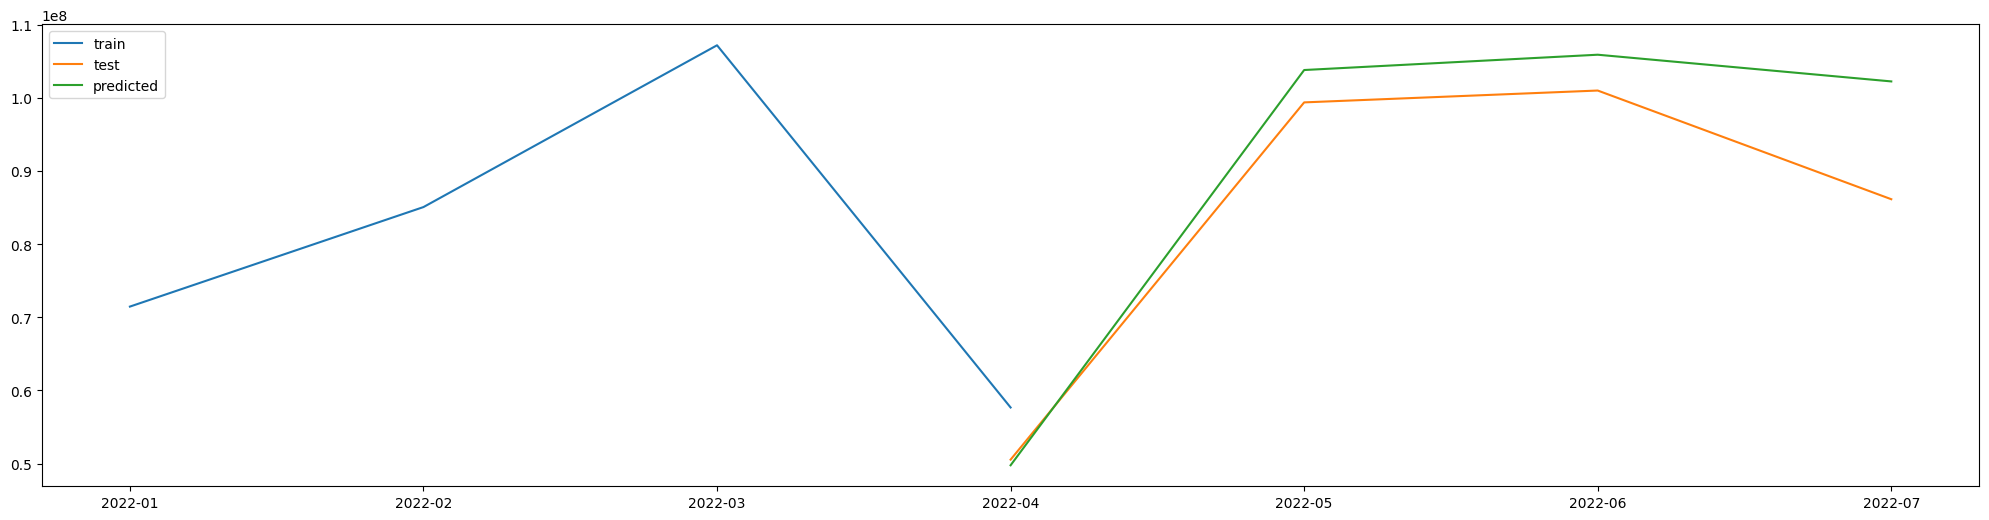

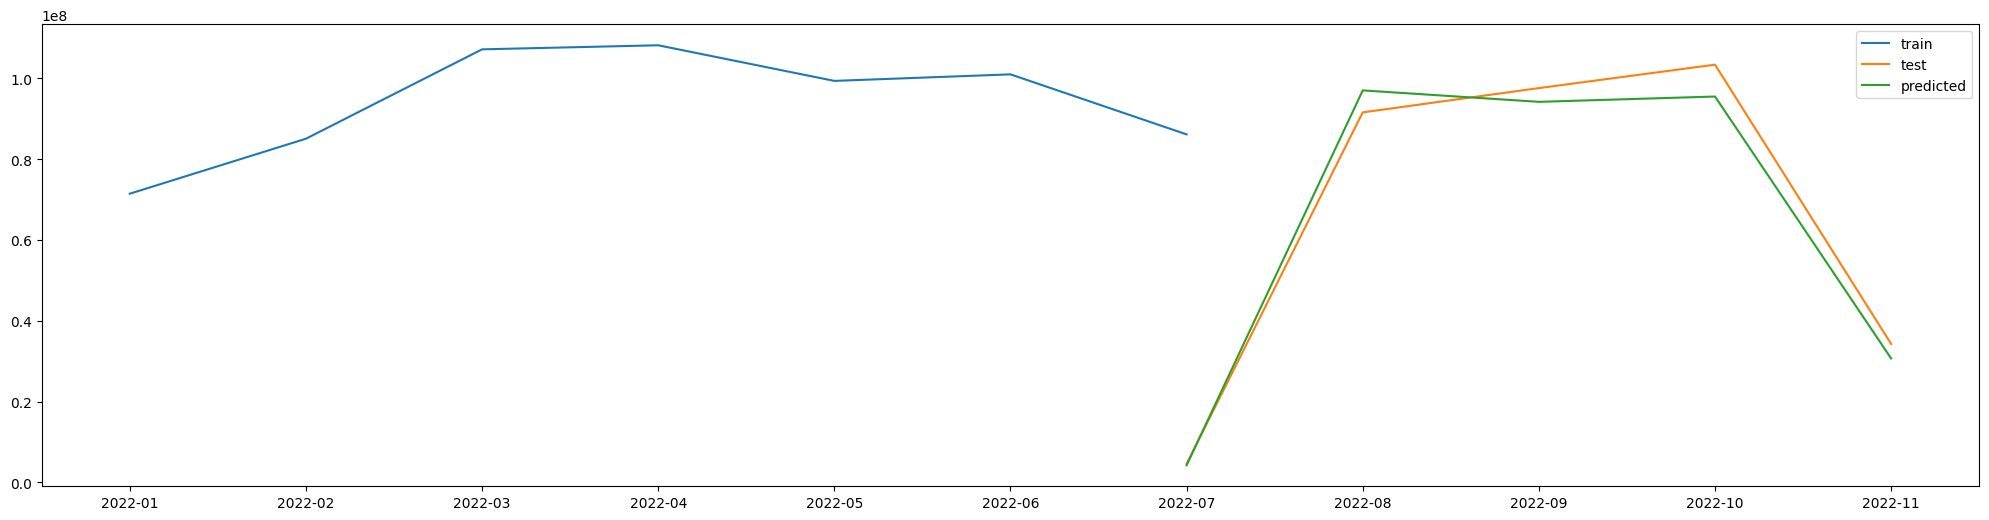

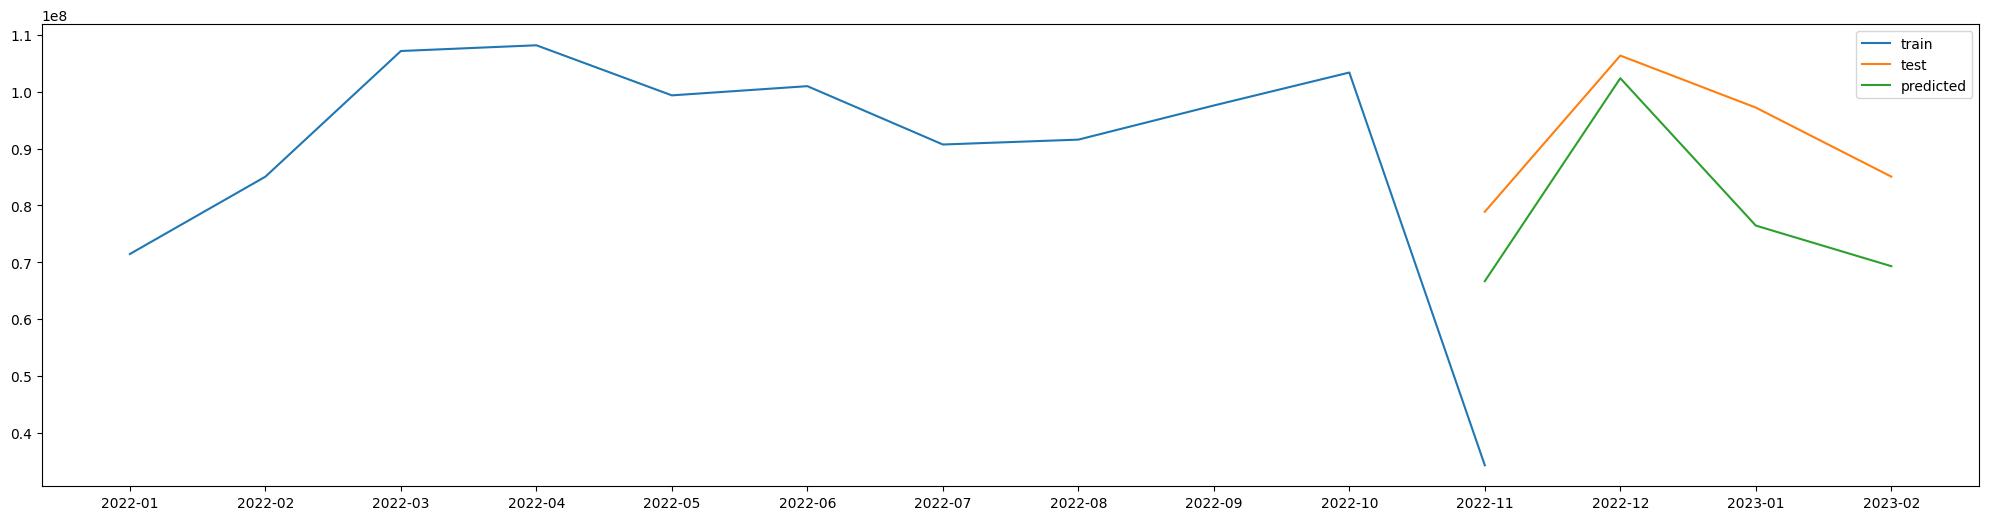

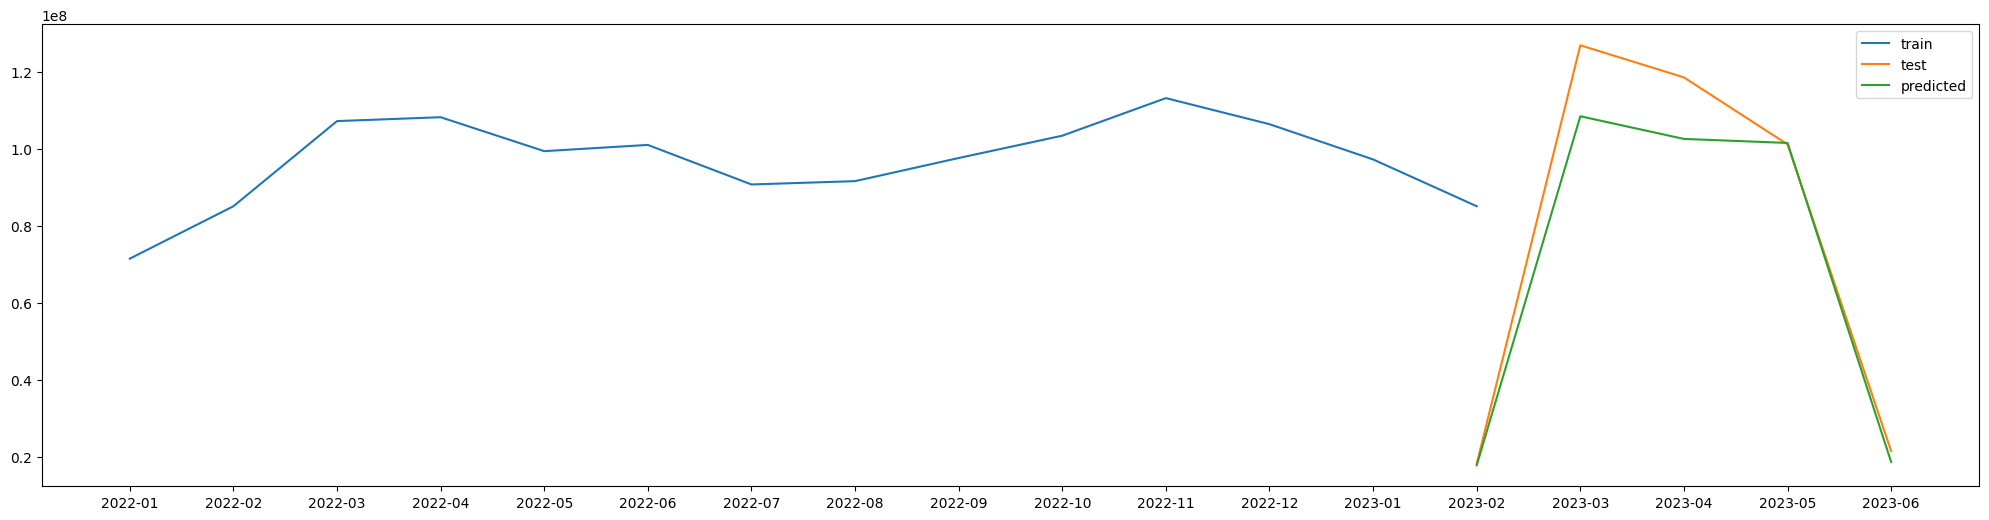

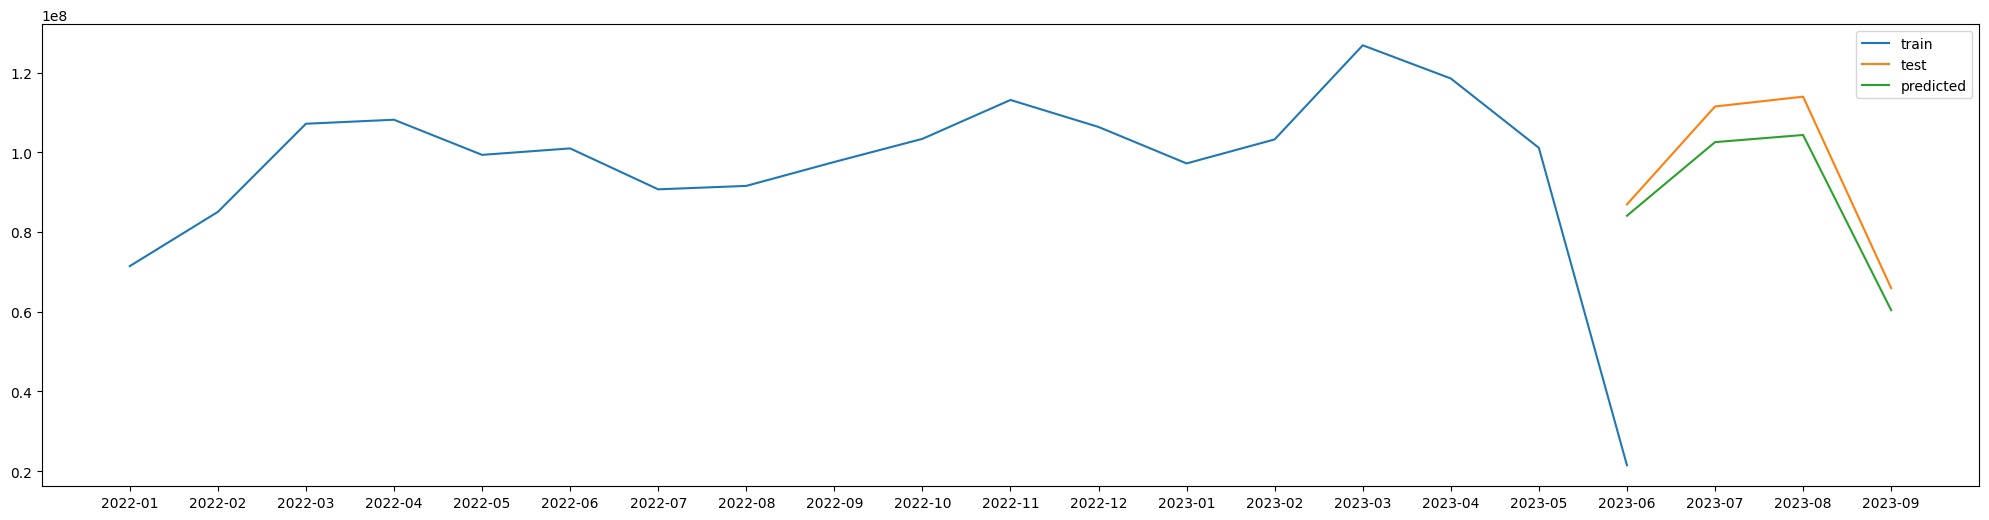

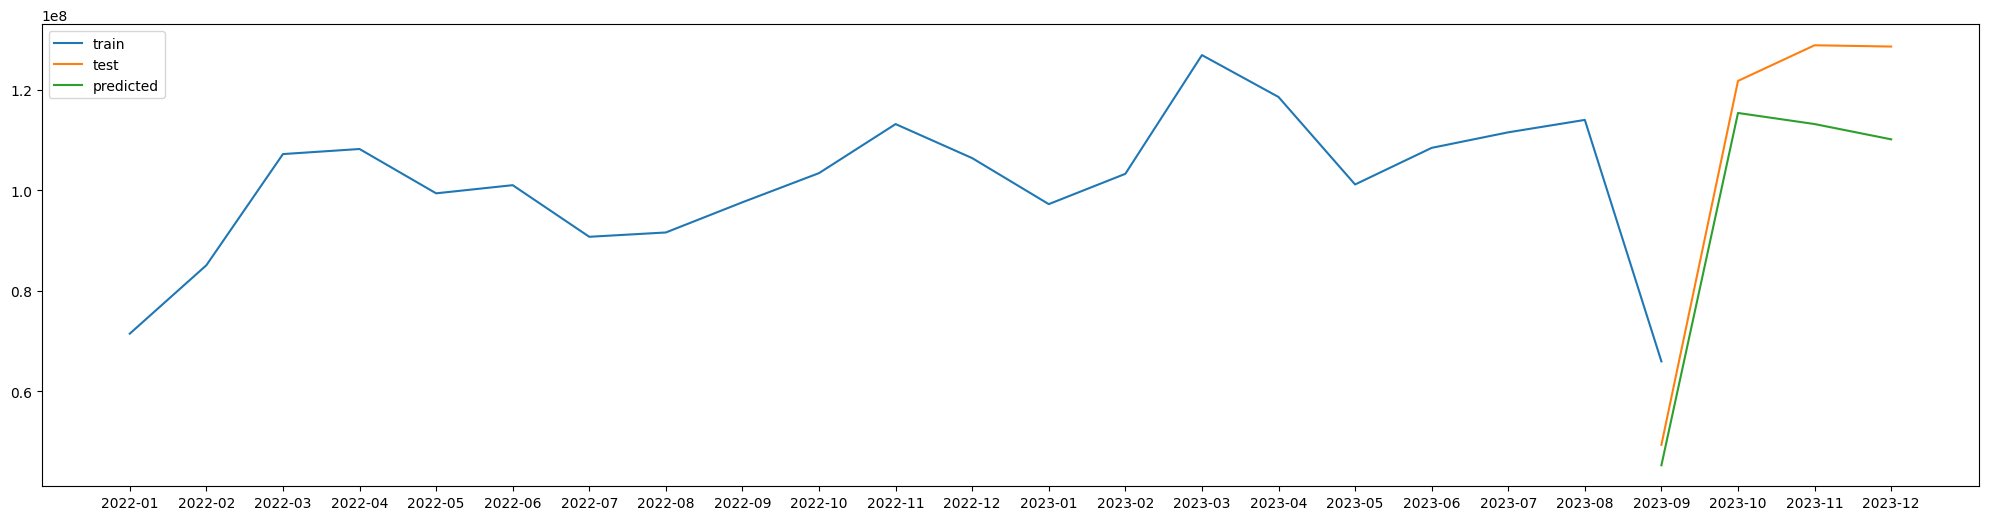

Среднее по дням MAE: 479499.70901716285
Среднее по дням MAPE: 0.14168040921201644
Среднее по месяцам MAE: 8226277.900037748
Среднее по месяцам MAPE: 0.09167063770961713


In [82]:
day_mae_scores = []
day_mape_scores = []
month_mae_scores = []
month_mape_scores = []


tscv = TimeSeriesSplit(n_splits=6)
# 0   service_amount_net  730 non-null    float64       cel
#  1   is_hospital         730 non-null    float64       +
#  2   weekday_name        730 non-null    float64       -
#  3   weekends            730 non-null    float64       +
#  4   holidays            730 non-null    float64       -
#  5   service_code_mean   730 non-null    float64       +
#  6   delta_seconds       730 non-null    float64       -
#  7   correction_count    730 non-null    float64       +
#  8   amount_std          730 non-null    float64       +
#  9   service_date_month  730 non-null    object        -
#  10  date                730 non-null    datetime64    -
#  11  year                730 non-null    float64       +
#  12  month               730 non-null    float64       -
#  13  day                 730 non-null    float64       -
#  14  inflation           730 non-null    float64       +
#  15  RPSS2023            730 non-null    int64         -
#  16  stock_price         730 non-null    float64       +

for train_index, test_index in tscv.split(aggregated_data):

    X_train_cv_cor_count, X_test_cv_cor_count = aggregated_data.iloc[train_index], aggregated_data.iloc[test_index]

    y_train_cv_cor_count = X_train_cv_cor_count[['correction_count']]
    y_test_cv_cor_count = X_test_cv_cor_count[['correction_count']]

    X_train_ex_cv_cor_count = X_train_cv_cor_count[['weekends', 'month', 'day', 'weekday_name', 'holidays',]] #  ,inflation, delta_seconds   ||| 'service_code_mean', 'correction_count', 'amount_std', 'is_hospital', 'weekends', 'RPSS2023', 'year', 'stock_price'
    X_test_ex_cv_cor_count = X_test_cv_cor_count[['weekends', 'month', 'day', 'weekday_name', 'holidays',]] #

    cat_model_cor_count = CatBoostRegressor(
        depth=6,
        iterations= 600,
        l2_leaf_reg=3,
        learning_rate= 0.01,
        verbose=0
    )

    y_cor_count_train_log = np.log1p(y_train_cv_cor_count)
    y_cor_count_test_log = np.log1p(y_test_cv_cor_count)

    cat_model_cor_count.fit(X_train_ex_cv_cor_count, y_cor_count_train_log)
    predict_cat_model_log_cor_count = cat_model_cor_count.predict(X_test_ex_cv_cor_count)


    predict_cat_model_cor_count = np.expm1(predict_cat_model_log_cor_count)

    X_train_cv, X_test_cv = aggregated_data.iloc[train_index], aggregated_data.iloc[test_index]

    X_train_cv['predict_cat_model_cor_count'] = X_train_cv['correction_count']
    X_test_cv['predict_cat_model_cor_count'] = predict_cat_model_cor_count

    y_train_cv = X_train_cv[['service_amount_net']]
    y_test_cv = X_test_cv[['service_amount_net']]

    X_train_ex_cv = X_train_cv[['weekends', 'month', 'predict_cat_model_cor_count',]]
    X_test_ex_cv = X_test_cv[[ 'weekends', 'month', 'predict_cat_model_cor_count',]]

    sd = StandardScaler()
    X_train_ex_cv = sd.fit_transform(X_train_ex_cv)
    X_test_ex_cv = sd.transform(X_test_ex_cv)

    y_train_cv_scaled = sd.fit_transform(y_train_cv)
    y_test_cv_scaled = sd.transform(y_test_cv)


    mod = SARIMAX(
        y_train_cv_scaled,
        exog=X_train_ex_cv,
        order=(2, 0, 6),
        trend=[0, 0],
        seasonal_order=(1, 0, 1, 7)
    )
    res = mod.fit(disp=False)

    forecast_cv = res.forecast(steps=len(X_test_cv), exog=X_test_ex_cv)

    y_test_cv_original = sd.inverse_transform(y_test_cv_scaled.reshape(-1, 1))
    forecast_cv_original = sd.inverse_transform(forecast_cv.reshape(-1, 1))

    day_mae = mean_absolute_error(y_test_cv_original, forecast_cv_original)
    day_mape = mean_absolute_percentage_error(y_test_cv_original, forecast_cv_original)

    day_mae_scores.append(day_mae)
    day_mape_scores.append(day_mape)

    X_month_train = X_train_cv[['service_amount_net', 'service_date_month']]

    X_month_train_agg = X_month_train.groupby('service_date_month').agg({
        'service_amount_net': 'sum',
    })

    X_month_test = X_test_cv[['service_amount_net', 'service_date_month']]
    X_month_test['forecast'] = forecast_cv_original
    X_month_test_agg = X_month_test.groupby('service_date_month').agg({
        'service_amount_net': 'sum',
        'forecast': 'sum'
    })

    month_mae = mean_absolute_error(X_month_test_agg['service_amount_net'], X_month_test_agg['forecast'])
    month_mape = mean_absolute_percentage_error(X_month_test_agg['service_amount_net'], X_month_test_agg['forecast'])

    month_mae_scores.append(month_mae)
    month_mape_scores.append(month_mape)

    plt.figure(figsize=(25, 6))

    plt.plot(X_month_train_agg.index, X_month_train_agg['service_amount_net'], label='train')
    plt.plot(X_month_test_agg.index, X_month_test_agg['service_amount_net'], label='test')
    plt.plot(X_month_test_agg.index, X_month_test_agg['forecast'], label='predicted')
    plt.legend()
    plt.show()

print(f'Среднее по дням MAE: {np.mean(day_mae_scores)}')
print(f'Среднее по дням MAPE: {np.mean(day_mape_scores)}')
print(f'Среднее по месяцам MAE: {np.mean(month_mae_scores)}')
print(f'Среднее по месяцам MAPE: {np.mean(month_mape_scores)}')

#Подготовка датафрейма для 2024 года

In [83]:

date_range = pd.date_range(start="2024-01-01", end="2024-12-31", freq="D")


data_2024 = pd.DataFrame(index=date_range)

data_2024['predicted'] = 0

data_2024['service_date_month'] = data_2024.index.to_period('M').astype(str)

data_2024['date'] = data_2024.index

data_2024.head()

,predicted,service_date_month,date
2024-01-01,0,2024-01,2024-01-01
2024-01-02,0,2024-01,2024-01-02
2024-01-03,0,2024-01,2024-01-03
2024-01-04,0,2024-01,2024-01-04
2024-01-05,0,2024-01,2024-01-05


In [84]:
def add_date_time_columns_2024(df, date_column):

    df[date_column] = pd.to_datetime(df[date_column])

    df['month'] = df[date_column].dt.month
    df['day'] = df[date_column].dt.day

    return df

data_2024 = add_date_time_columns_2024(data_2024, 'date')

from datetime import datetime
import numpy as np
days_ru = {
    0: "ПН",
    1: "ВТ",
    2: "СР",
    3: "ЧТ",
    4: "ПТ",
    5: "СБ",
    6: "ВС"
}

data_2024['weekday_name'] = data_2024['date'].dt.dayofweek.map(days_ru)

def wknd(x):
    if x == 'СБ' or x == 'ВС':
        return 1
    else:
        return 0
data_2024['weekends'] = np.vectorize(wknd)(data_2024['weekday_name'])

def hld_2024(x):
    m = [
        '2024-01-01',
        '2024-01-02',
        '2024-01-03',
        '2024-01-04',
        '2024-01-05',
        '2024-01-06',
        '2024-01-07',
        '2024-01-08',
        '2024-02-23',
        '2024-03-08',
        '2024-05-01',
        '2024-05-09',
        '2024-06-12',
        '2024-11-04',
        '2024-05-10',
        '2024-12-31',
        '2024-04-29',
        '2024-04-30',
        '2024-12-30'
    ]
    if x in m:
        return 1
    else:
        return 0
data_2024['holidays'] = np.vectorize(hld_2024)(data_2024['date'].astype(str))

data_2024.head()

,predicted,service_date_month,date,month,day,weekday_name,weekends,holidays
2024-01-01,0,2024-01,2024-01-01,1,1,ПН,0,1
2024-01-02,0,2024-01,2024-01-02,1,2,ВТ,0,1
2024-01-03,0,2024-01,2024-01-03,1,3,СР,0,1
2024-01-04,0,2024-01,2024-01-04,1,4,ЧТ,0,1
2024-01-05,0,2024-01,2024-01-05,1,5,ПТ,0,1


In [85]:
oe = OrdinalEncoder()
data_2024[['weekday_name']] = oe.fit_transform(data_2024[['weekday_name']])
data_2024

,predicted,service_date_month,date,month,day,weekday_name,weekends,holidays
2024-01-01,0,2024-01,2024-01-01,1,1,2.0,0,1
2024-01-02,0,2024-01,2024-01-02,1,2,1.0,0,1
2024-01-03,0,2024-01,2024-01-03,1,3,5.0,0,1
2024-01-04,0,2024-01,2024-01-04,1,4,6.0,0,1
2024-01-05,0,2024-01,2024-01-05,1,5,3.0,0,1
...,...,...,...,...,...,...,...,...
2024-12-27,0,2024-12,2024-12-27,12,27,3.0,0,0
2024-12-28,0,2024-12,2024-12-28,12,28,4.0,1,0
2024-12-29,0,2024-12,2024-12-29,12,29,0.0,1,0
2024-12-30,0,2024-12,2024-12-30,12,30,2.0,0,1


#Основная модель

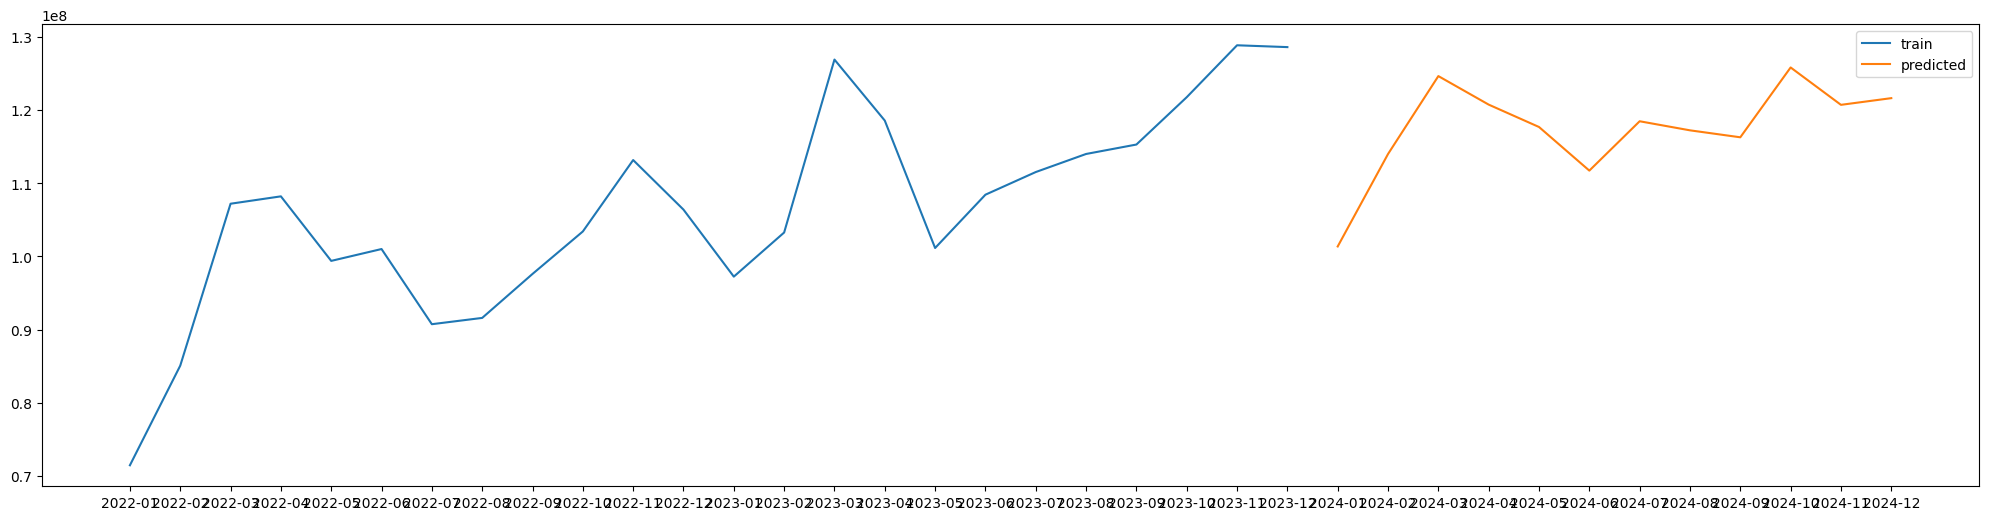

In [86]:
X_train_2024_cor_count = aggregated_data[['weekends', 'month', 'day', 'weekday_name', 'holidays']]
y_train_2024_cor_count = aggregated_data['correction_count']
X_test_2024_cor_count = data_2024[['weekends', 'month', 'day', 'weekday_name', 'holidays']]

cat_model_cor_count_2024 = CatBoostRegressor(
        depth=6,
        iterations= 600,
        l2_leaf_reg=3,
        learning_rate= 0.01,
        verbose=0
    )

y_train_log_2024_cor_count = np.log1p(y_train_2024_cor_count)

cat_model_cor_count_2024.fit(X_train_2024_cor_count, y_train_log_2024_cor_count)
predict_cat_model_log_cor_count_2024 = cat_model_cor_count_2024.predict(X_test_2024_cor_count)

predict_cat_model_cor_count_2024 = np.expm1(predict_cat_model_log_cor_count_2024)

X_train_2024 = aggregated_data
X_test_2024 = data_2024

X_train_2024['predict_cat_model_cor_count'] = X_train_2024['correction_count']
X_test_2024['predict_cat_model_cor_count'] = predict_cat_model_cor_count_2024

y_train_2024 = X_train_2024[['service_amount_net']]

X_train_ex_2024 = X_train_2024[['weekends', 'month', 'predict_cat_model_cor_count']]
X_test_ex_2024 = X_test_2024[[ 'weekends', 'month', 'predict_cat_model_cor_count']]

sd = StandardScaler()
X_train_ex_2024 = sd.fit_transform(X_train_ex_2024)
X_test_ex_2024 = sd.transform(X_test_ex_2024)

y_train_2024_scaled = sd.fit_transform(y_train_2024)

mod_2024 = SARIMAX(
    y_train_2024_scaled,
    exog=X_train_ex_2024,
    order=(2, 0, 6),
    trend=[0, 0],
    seasonal_order=(1, 0, 1, 7)
)

res_2024 = mod_2024.fit(disp=False)

forecast_2024 = res_2024.forecast(steps=len(X_test_2024), exog=X_test_ex_2024)

forecast_2024_original = sd.inverse_transform(forecast_2024.reshape(-1, 1))

X_month_train_2024 = X_train_2024[['service_amount_net', 'service_date_month']]

X_month_train_agg_2024 = X_month_train_2024.groupby('service_date_month').agg({
    'service_amount_net': 'sum',
})

X_month_test_2024 = X_test_2024[['service_date_month']]
X_month_test_2024['forecast'] = forecast_2024_original
X_month_test_agg_2024 = X_month_test_2024.groupby('service_date_month').agg({
    'forecast': 'sum'
})

plt.figure(figsize=(25, 6))
plt.plot(X_month_train_agg_2024.index, X_month_train_agg_2024['service_amount_net'], label='train')
plt.plot(X_month_test_agg_2024.index, X_month_test_agg_2024['forecast'], label='predicted')
plt.legend()
plt.show()
